# **ASSIGNMENT 14** #

## ***2. FRAUD DATA*** ##

File : Fraud_check.csv

In [1]:
# import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree, preprocessing, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN


import warnings
warnings.filterwarnings('ignore')
palette_color = sns.color_palette('rainbow')

### **Importing data from file Fraud_check.csv** ###

In [2]:
# Reading the data from the file 'Fraud_check.csv'
fraud_orig_data = pd.read_csv("Fraud_check.csv")
fraud_orig_data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [3]:
fraud_orig_data.shape

(600, 6)

#### *Descriptive Analysis* ####

In [4]:
fraud_orig_data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [5]:
fraud_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


#### *Checking for missing values* ####

In [6]:
# check for missing values
fraud_orig_data.isna().sum() # The result shows that there are no missing values

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

#### *Checking for Null Values* ####

In [7]:
# Checking to see if there are any null values
# We can get this information using fraud_orig_data.info() option as well
fraud_orig_data.isnull().sum() # The result shows that there are no null values

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

#### *Checking for duplicates* ####

In [8]:
# Checking for Duplicate Values
fraud_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [9]:
# Count of duplicated rows
fraud_orig_data[fraud_orig_data.duplicated()].shape # We see that there are no duplicate

(0, 6)

In [10]:
# Print the duplicated rows. Since we have duplicates it will show us the record
fraud_orig_data[fraud_orig_data.duplicated()] # We don't find any duplicates

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []

#### *Checking the data structure* ####

In [11]:
fraud_data = fraud_orig_data.copy() # Creating a replicate 'company_data' of the original DataFrame 'company_orig_data'

In [12]:
# Data Structure
print(type(fraud_data))
fraud_data.shape

<class 'pandas.core.frame.DataFrame'>


(600, 6)

#### *Rename Columns* ####

In [13]:
# Renaming column names
fraud_data.rename(columns = {'Undergrad':'UG','Marital.Status':'MS','Taxable.Income':'TAX','City.Population':'POPU','Work.Experience':'W_EXP','Urban':'URBAN'}, inplace = True)
fraud_data.head()

UG        MS    TAX    POPU  W_EXP URBAN
0   NO    Single  68833   50047     10   YES
1  YES  Divorced  33700  134075     18   YES
2   NO   Married  36925  160205     30   YES
3  YES    Single  50190  193264     15   YES
4   NO   Married  81002   27533     28    NO

In [14]:
# Checking data types
fraud_data.dtypes # check data types of all variables

UG       object
MS       object
TAX       int64
POPU      int64
W_EXP     int64
URBAN    object
dtype: object

#### *Feature Engineering - Creating a new 'taxable_income' Categorical Column* ####

In [15]:
fraud_data

UG        MS    TAX    POPU  W_EXP URBAN
0     NO    Single  68833   50047     10   YES
1    YES  Divorced  33700  134075     18   YES
2     NO   Married  36925  160205     30   YES
3    YES    Single  50190  193264     15   YES
4     NO   Married  81002   27533     28    NO
..   ...       ...    ...     ...    ...   ...
595  YES  Divorced  76340   39492      7   YES
596  YES  Divorced  69967   55369      2   YES
597   NO  Divorced  47334  154058      0   YES
598  YES   Married  98592  180083     17    NO
599   NO  Divorced  96519  158137     16    NO

[600 rows x 6 columns]

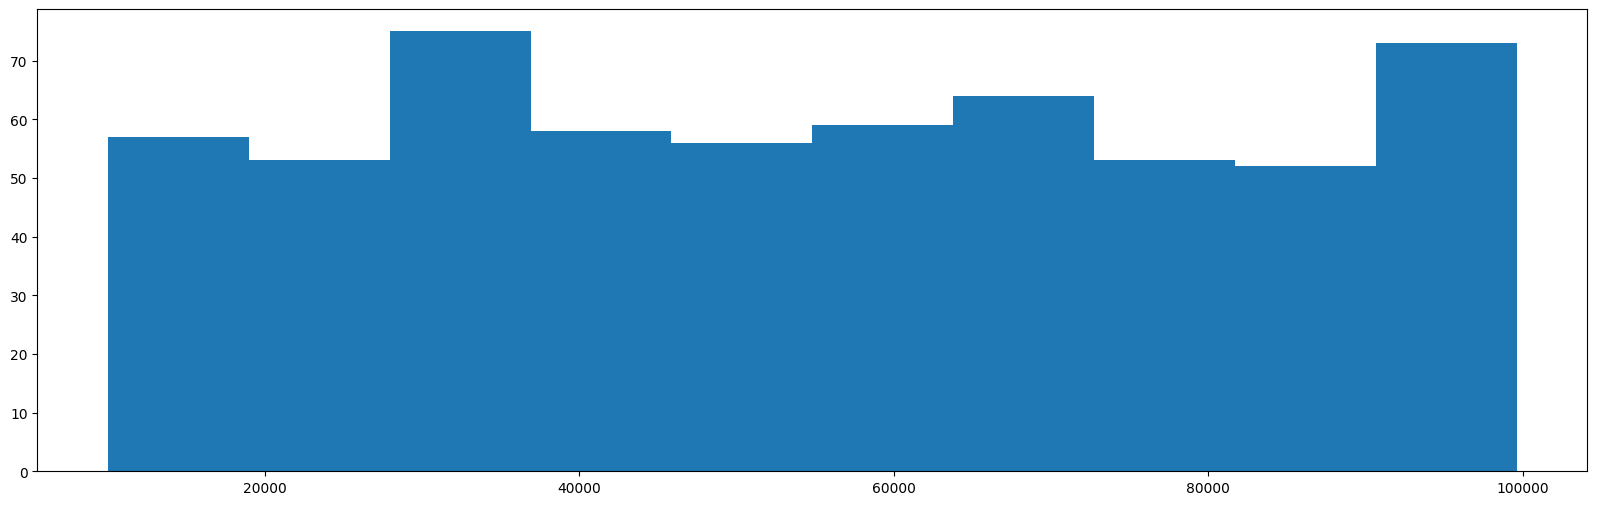

99619

In [16]:
plt.figure(figsize=(20,6))
plt.hist('TAX',data=fraud_data)
plt.show()

max_taxable_income = fraud_data.TAX.max()
max_taxable_income

In [17]:
fraud_data['TAX_CAT'] = pd.cut(x = fraud_data['TAX'], bins = [0,30000,100000], labels=['Risky','Good'], right = False)
fraud_data.head()

UG        MS    TAX    POPU  W_EXP URBAN TAX_CAT
0   NO    Single  68833   50047     10   YES    Good
1  YES  Divorced  33700  134075     18   YES    Good
2   NO   Married  36925  160205     30   YES    Good
3  YES    Single  50190  193264     15   YES    Good
4   NO   Married  81002   27533     28    NO    Good

In [18]:
fraud_data.TAX_CAT.value_counts()

TAX_CAT
Good     476
Risky    124
Name: count, dtype: int64

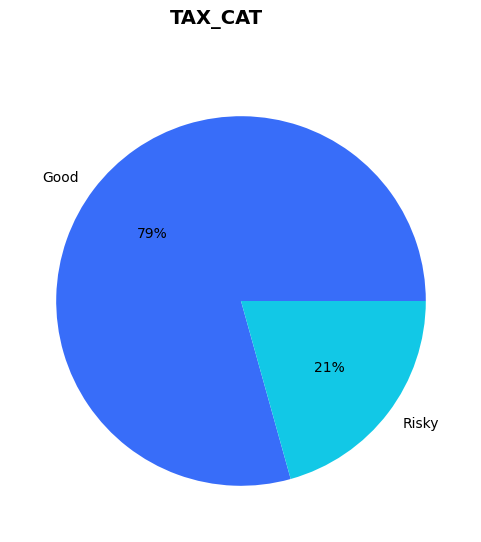

In [19]:
# Display state data in a form of Pie Graph
plt.figure(figsize=(20,6))
values = fraud_data['TAX_CAT'].value_counts().keys().tolist()
counts = fraud_data['TAX_CAT'].value_counts().tolist()
plt.pie(fraud_data['TAX_CAT'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('TAX_CAT', weight='bold').set_fontsize('14')

plt.show()

##### **INFERENCE:** #####
The **Target column 'TAX_CAT' is UnBalanced** i.e., it is not evenly distributed, with 'Good' samples being more i.e., 476 (79%) than 'Risky' with 124 (21%)

#### ***Segregating the columns into Numeric and Non-Numeric*** ####

In [20]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   UG       600 non-null    object  
 1   MS       600 non-null    object  
 2   TAX      600 non-null    int64   
 3   POPU     600 non-null    int64   
 4   W_EXP    600 non-null    int64   
 5   URBAN    600 non-null    object  
 6   TAX_CAT  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [21]:
categorical_cols = []
numeric_cols = []
for columns in fraud_data.columns:
      if ((fraud_data[columns].dtypes == 'object') or (fraud_data[columns].dtypes == 'category')):
            categorical_cols.append(columns)
            print(f"There are {len(fraud_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif ((fraud_data[columns].dtypes != 'object') and (fraud_data[columns].dtypes != 'category')):
            numeric_cols.append(columns)

print("\nThe categorical columns are: ",categorical_cols,"\n")
print("The numeric columns are: ",numeric_cols,"\n")

There are 2 unique values in the categorical column name 'UG'
There are 3 unique values in the categorical column name 'MS'
There are 2 unique values in the categorical column name 'URBAN'
There are 2 unique values in the categorical column name 'TAX_CAT'

The categorical columns are:  ['UG', 'MS', 'URBAN', 'TAX_CAT'] 

The numeric columns are:  ['TAX', 'POPU', 'W_EXP'] 



In [22]:
# Categorical variables
# For columns in company_data.columns:
# If fraud_data[columns].dtypes == 'object' or fraud_data[columns].dtypes == 'category':
for columns in fraud_data[categorical_cols].columns:
        unique_count = len(fraud_data[columns].unique())
        print("\n------------------------------------------")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n",fraud_data[columns].value_counts())


------------------------------------------
There are 2 unique columns in the column name 'UG'

 UG
YES    312
NO     288
Name: count, dtype: int64

------------------------------------------
There are 3 unique columns in the column name 'MS'

 MS
Single      217
Married     194
Divorced    189
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'URBAN'

 URBAN
YES    302
NO     298
Name: count, dtype: int64

------------------------------------------
There are 2 unique columns in the column name 'TAX_CAT'

 TAX_CAT
Good     476
Risky    124
Name: count, dtype: int64


In [23]:
fraud_data[numeric_cols].head()

TAX    POPU  W_EXP
0  68833   50047     10
1  33700  134075     18
2  36925  160205     30
3  50190  193264     15
4  81002   27533     28

In [24]:
fraud_data[categorical_cols].head()

UG        MS URBAN TAX_CAT
0   NO    Single   YES    Good
1  YES  Divorced   YES    Good
2   NO   Married   YES    Good
3  YES    Single   YES    Good
4   NO   Married    NO    Good

In [25]:
# Creating dataframes for both categorical data as well as numeric data
fraud_cat_comp_data = pd.DataFrame()
fraud_num_comp_data = pd.DataFrame()

fraud_cat_comp_data = fraud_data[categorical_cols]
fraud_num_comp_data = fraud_data[numeric_cols]

print(f"The numerical data is - \n{fraud_num_comp_data.head()}\n\nThe categorical data is - \n{fraud_cat_comp_data.head()}")

The numerical data is - 
     TAX    POPU  W_EXP
0  68833   50047     10
1  33700  134075     18
2  36925  160205     30
3  50190  193264     15
4  81002   27533     28

The categorical data is - 
    UG        MS URBAN TAX_CAT
0   NO    Single   YES    Good
1  YES  Divorced   YES    Good
2   NO   Married   YES    Good
3  YES    Single   YES    Good
4   NO   Married    NO    Good


In [26]:
fraud_num_comp_data.head()

TAX    POPU  W_EXP
0  68833   50047     10
1  33700  134075     18
2  36925  160205     30
3  50190  193264     15
4  81002   27533     28

In [27]:
fraud_cat_comp_data

UG        MS URBAN TAX_CAT
0     NO    Single   YES    Good
1    YES  Divorced   YES    Good
2     NO   Married   YES    Good
3    YES    Single   YES    Good
4     NO   Married    NO    Good
..   ...       ...   ...     ...
595  YES  Divorced   YES    Good
596  YES  Divorced   YES    Good
597   NO  Divorced   YES    Good
598  YES   Married    NO    Good
599   NO  Divorced    NO    Good

[600 rows x 4 columns]

### **Visualizations** ###

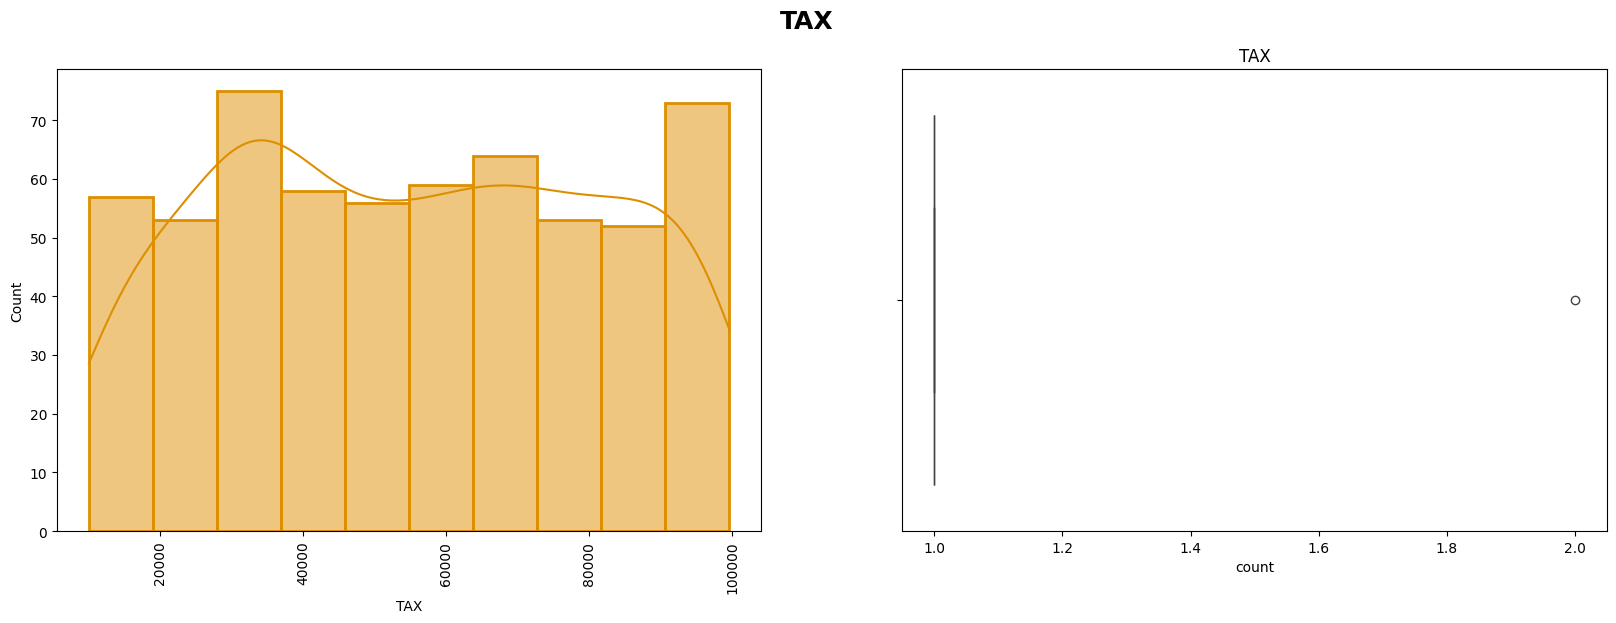

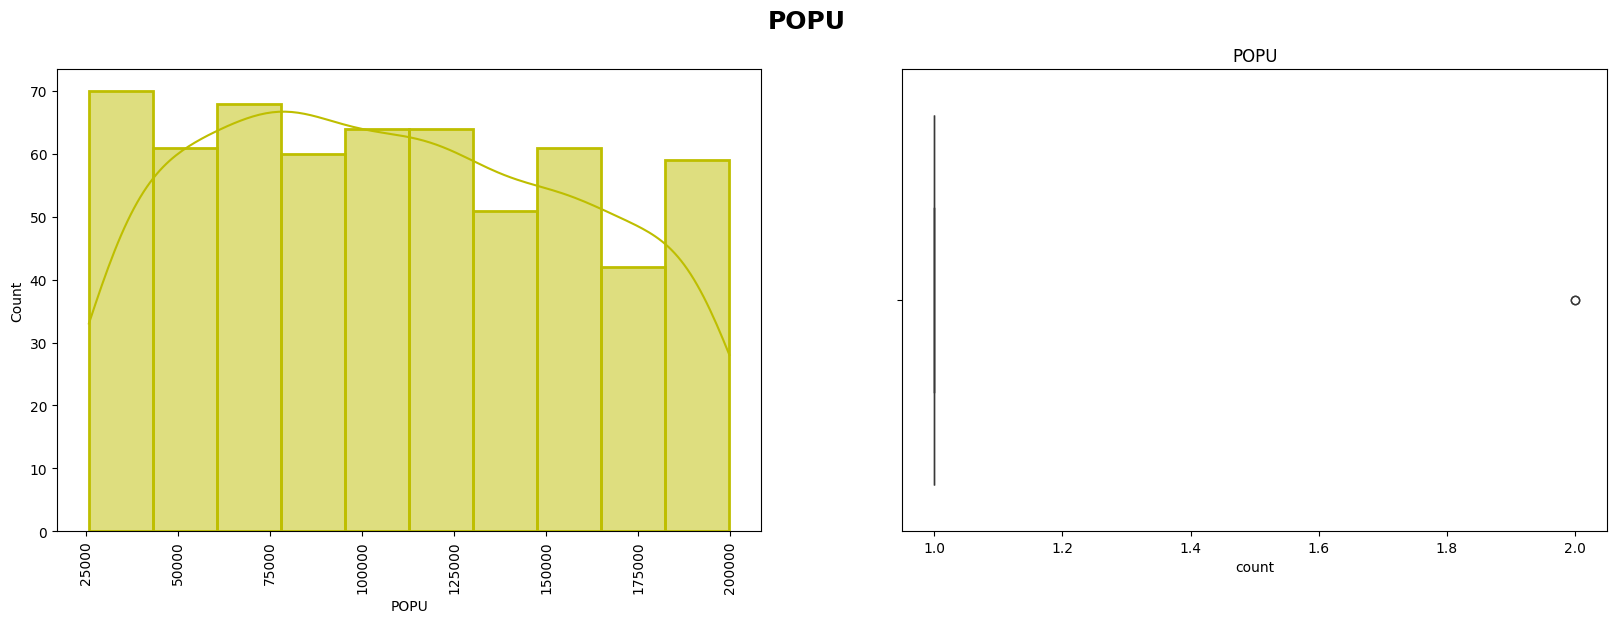

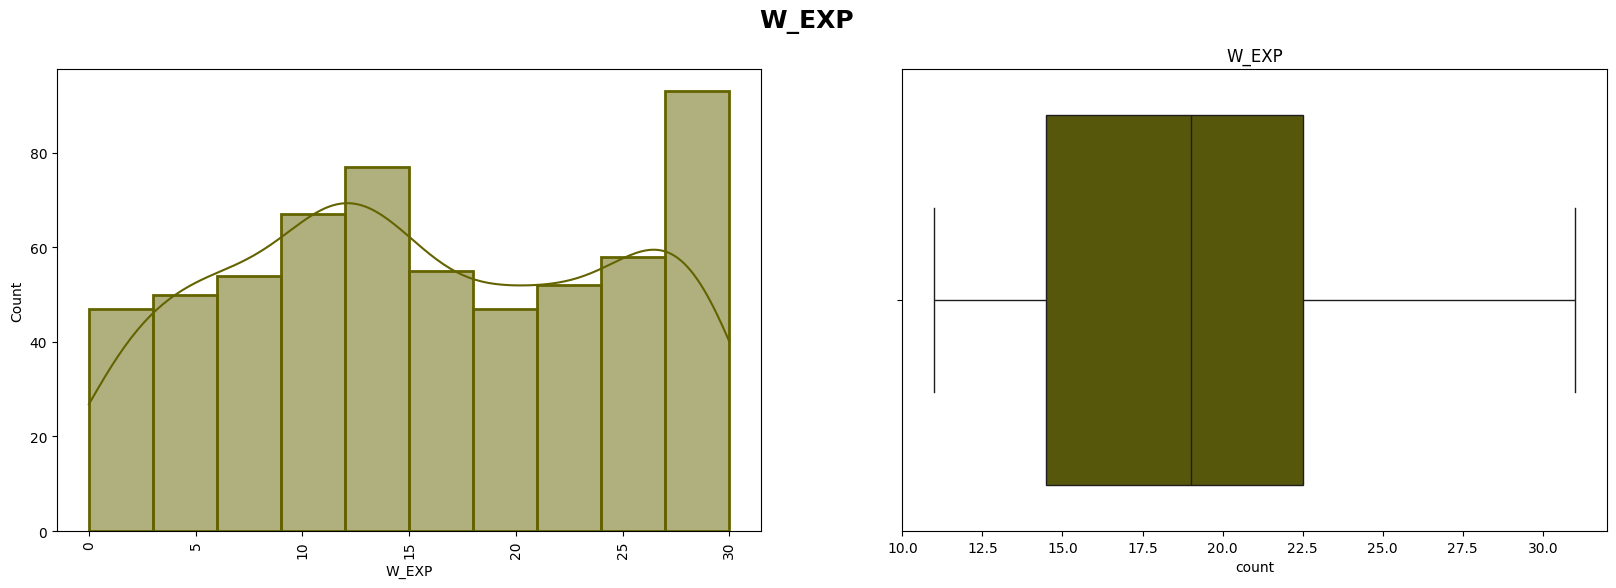

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.suptitle(feature, weight='bold').set_fontsize('18')

for n_cols in fraud_num_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(fraud_num_comp_data,n_cols)
    plt.title(n_cols)

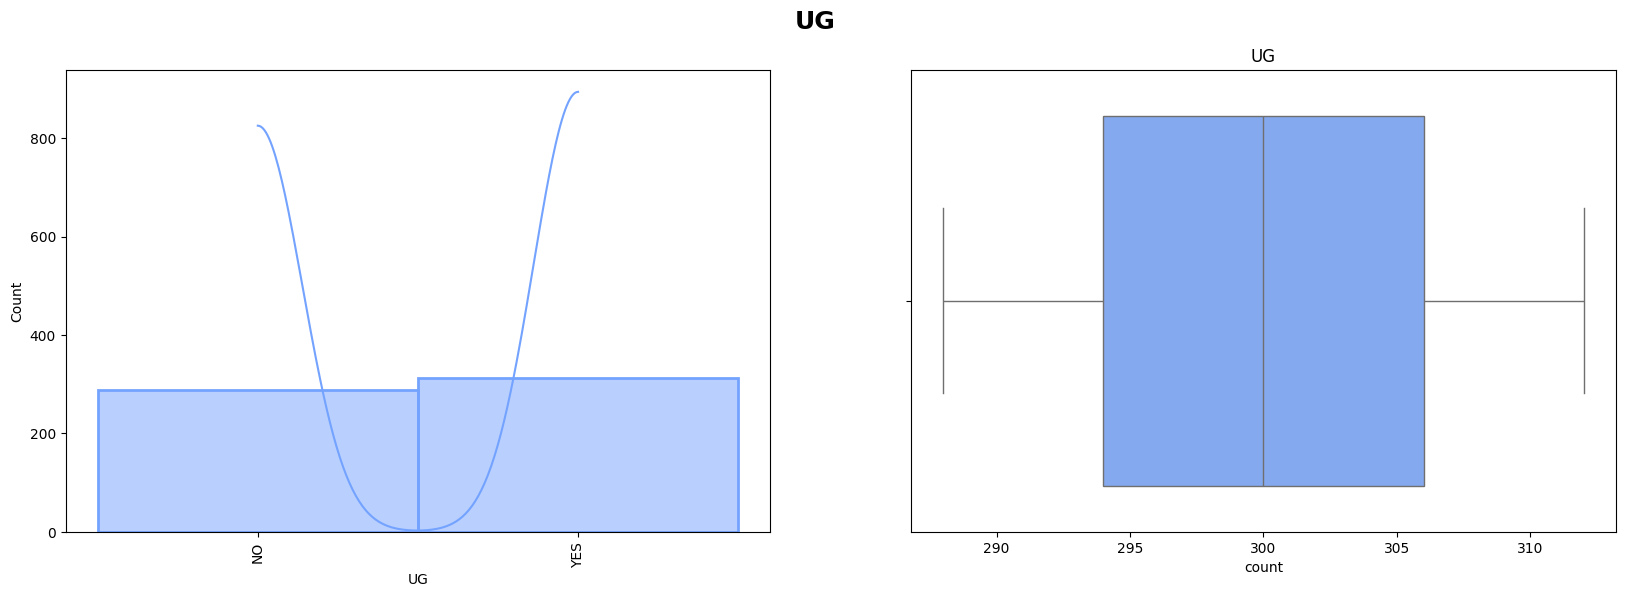

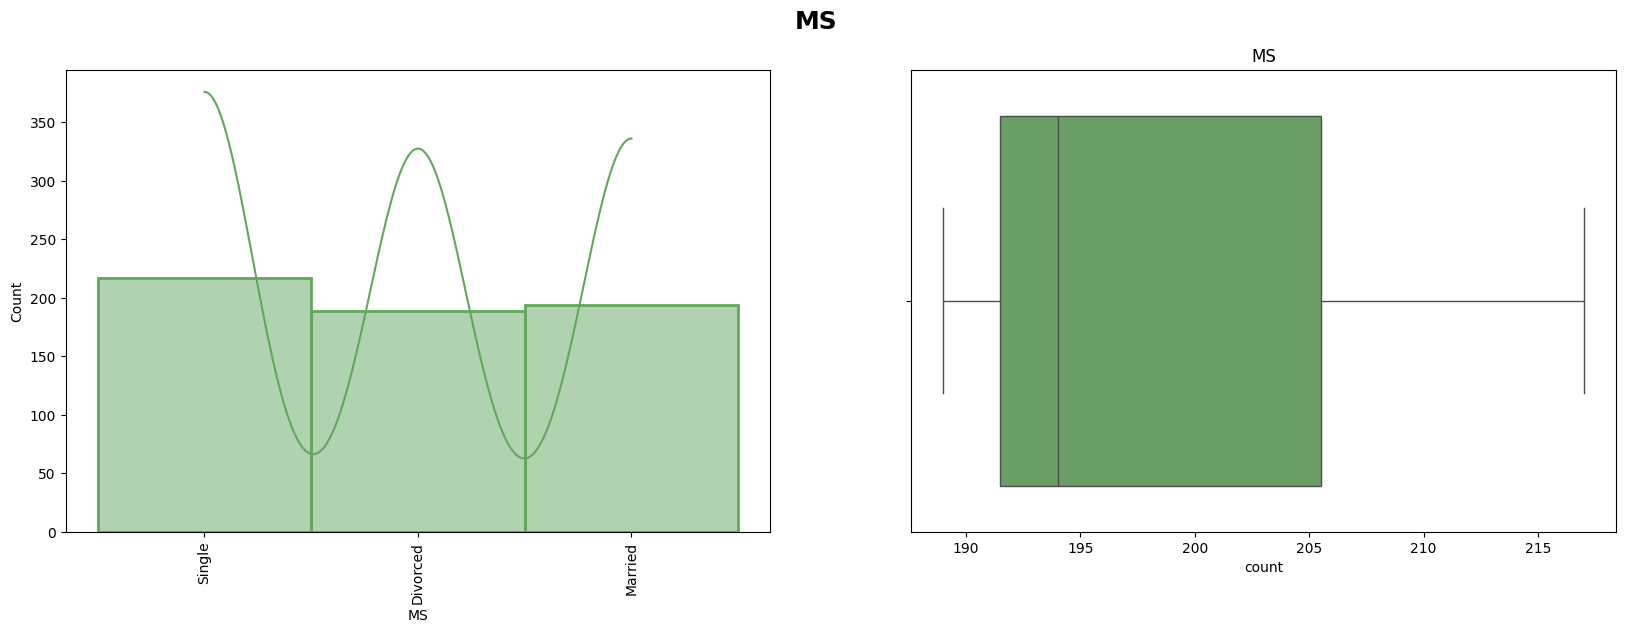

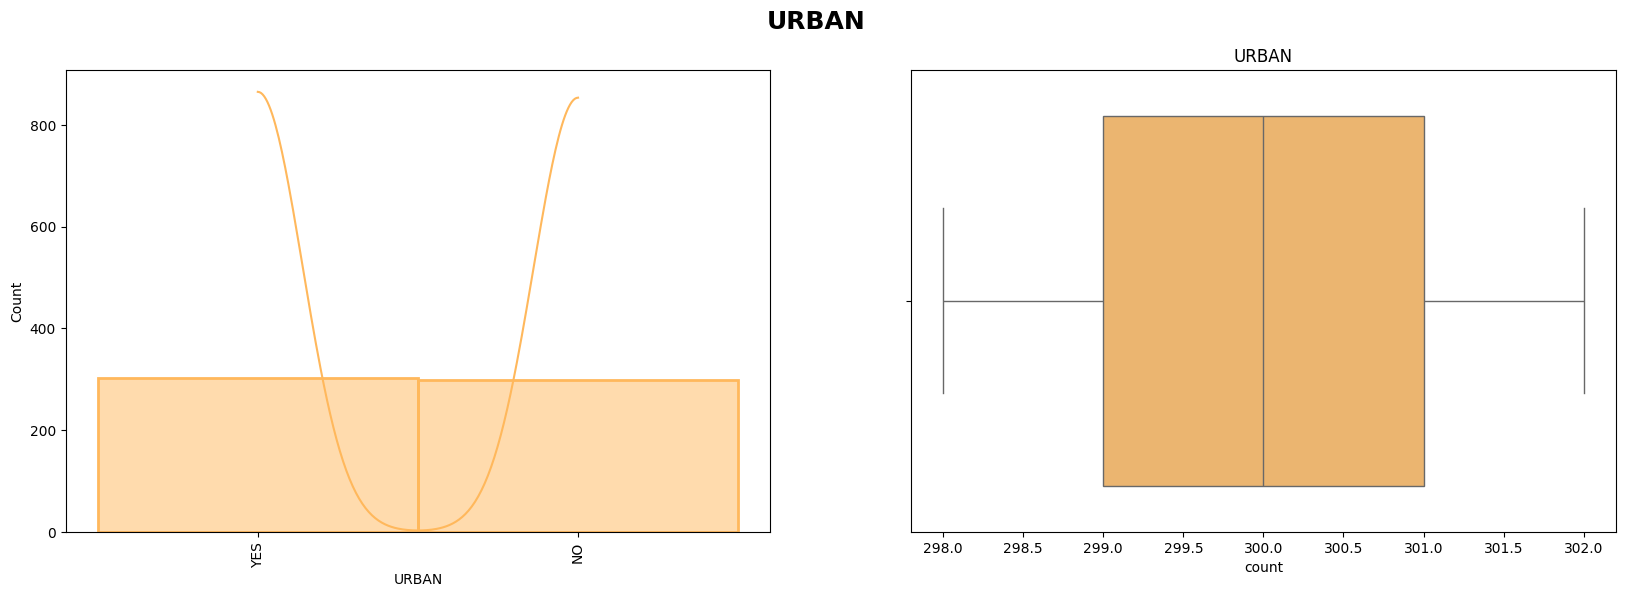

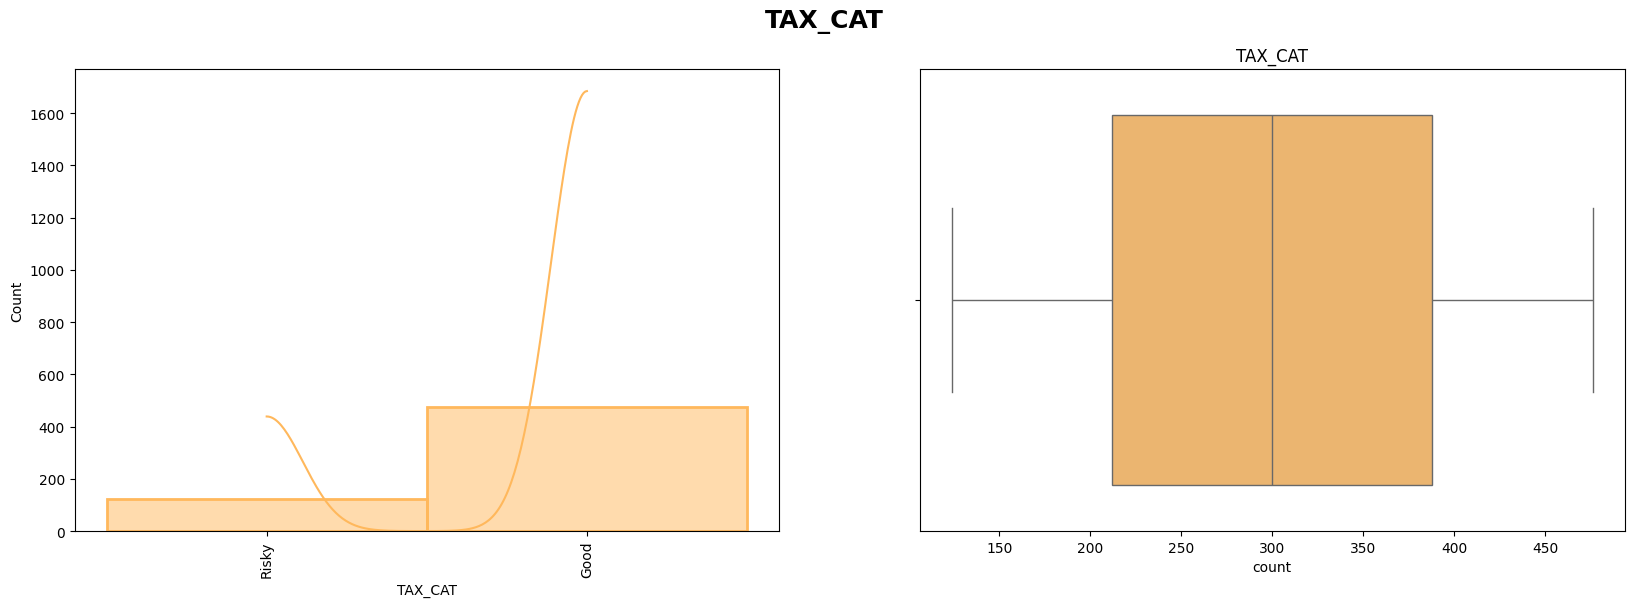

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.suptitle(feature, weight='bold').set_fontsize('18')

for c_cols in fraud_cat_comp_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(fraud_cat_comp_data,c_cols)
    plt.title(c_cols)

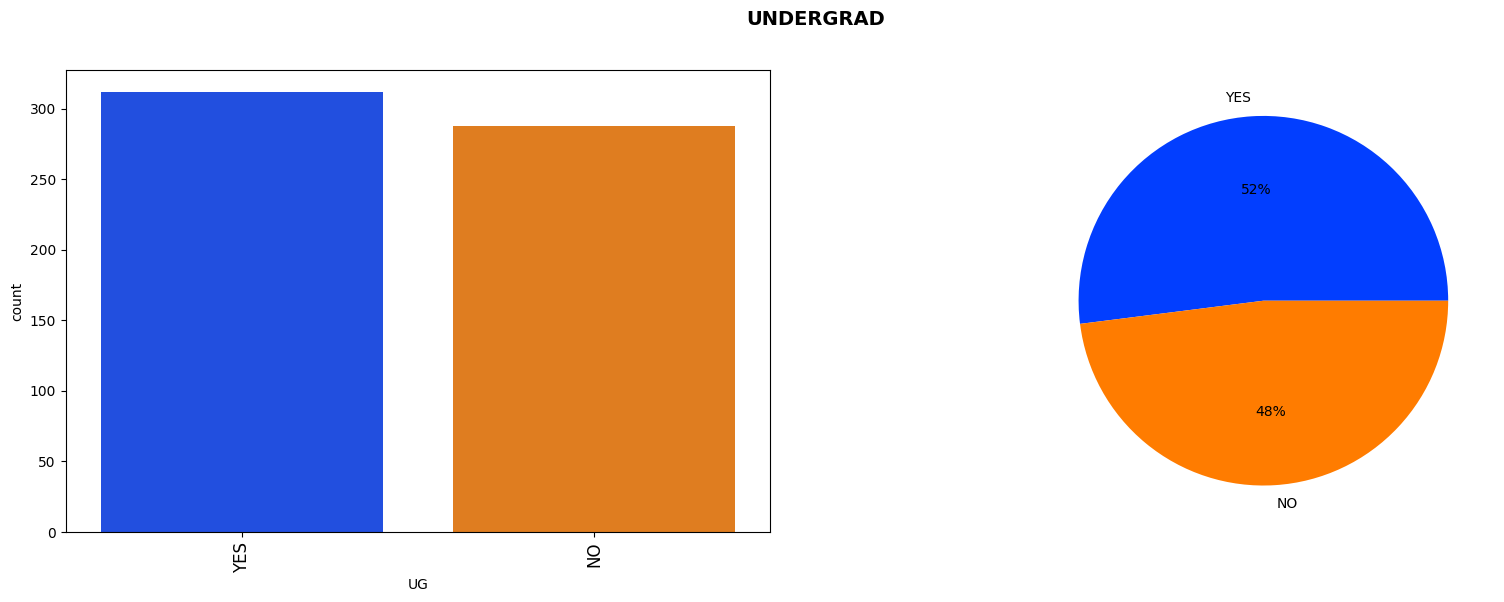

In [30]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='UG', data=fraud_cat_comp_data, palette = palette_color, order=fraud_cat_comp_data['UG'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = fraud_cat_comp_data['UG'].value_counts().keys().tolist()
counts = fraud_cat_comp_data['UG'].value_counts().tolist()
plt.pie(fraud_cat_comp_data['UG'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('UNDERGRAD', weight='bold').set_fontsize('14')

plt.show()

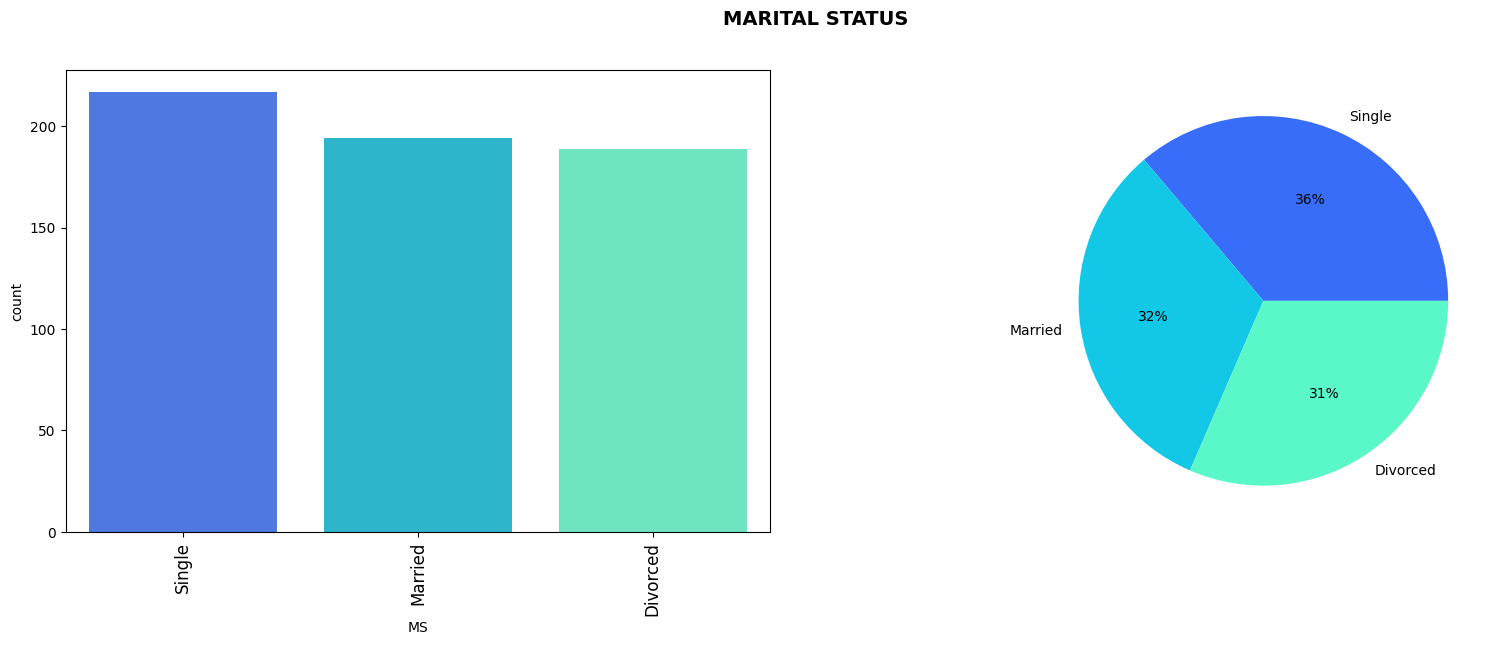

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='MS', data=fraud_cat_comp_data, palette = palette_color, order=fraud_cat_comp_data['MS'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = fraud_cat_comp_data['MS'].value_counts().keys().tolist()
counts = fraud_cat_comp_data['MS'].value_counts().tolist()
plt.pie(fraud_cat_comp_data['MS'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('MARITAL STATUS', weight='bold').set_fontsize('14')

plt.show()

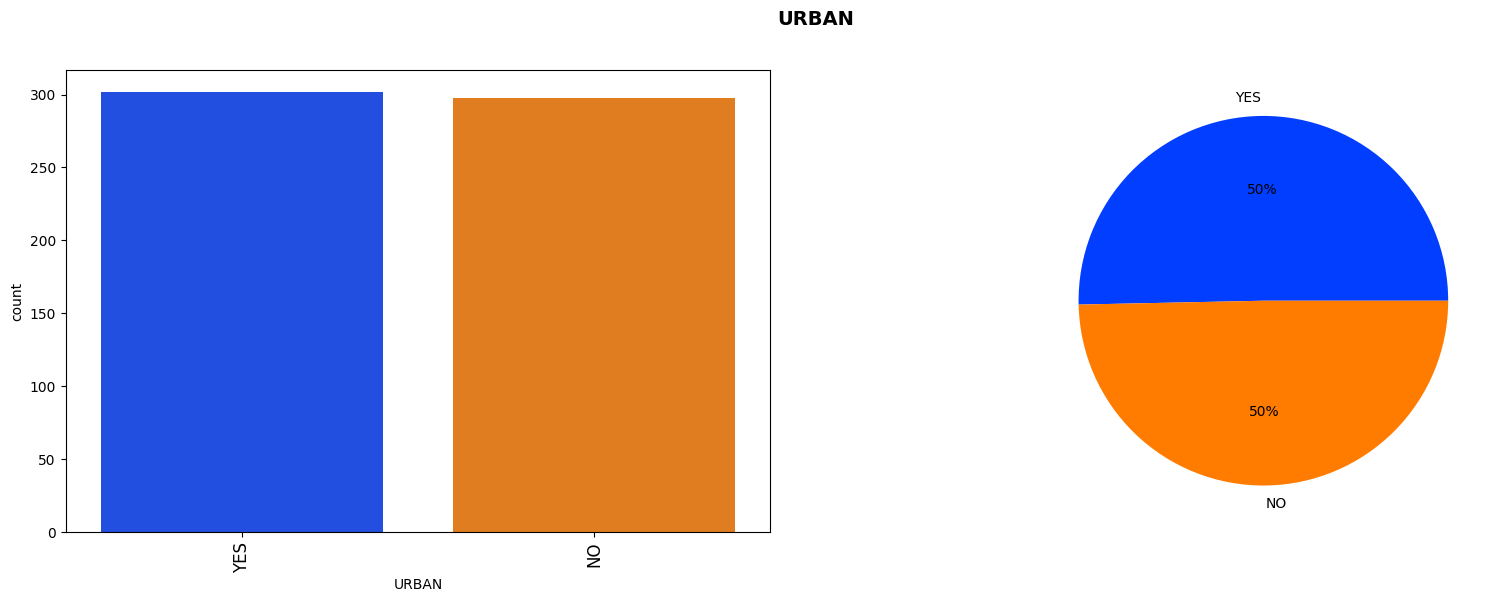

In [32]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='URBAN', data=fraud_cat_comp_data, palette = palette_color, order=fraud_cat_comp_data['URBAN'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = fraud_cat_comp_data['URBAN'].value_counts().keys().tolist()
counts = fraud_cat_comp_data['URBAN'].value_counts().tolist()
plt.pie(fraud_cat_comp_data['URBAN'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('URBAN', weight='bold').set_fontsize('14')

plt.show()

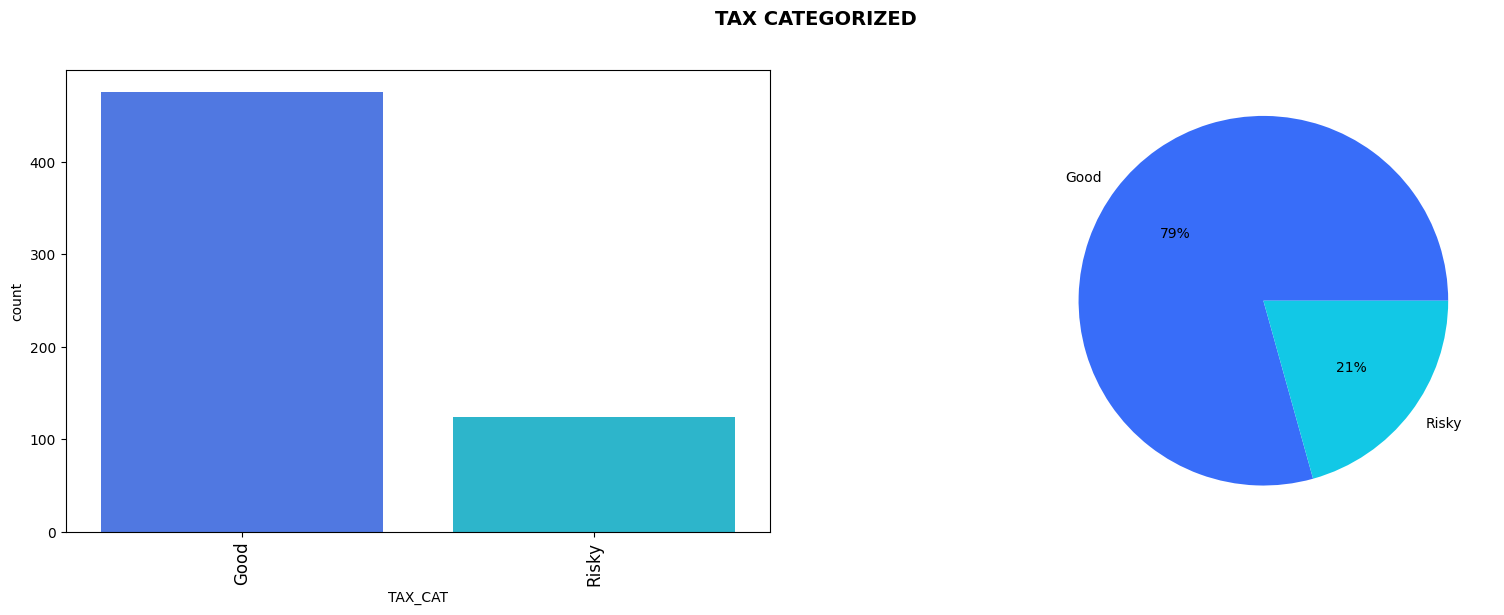

In [33]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='TAX_CAT', data=fraud_cat_comp_data, palette = palette_color, order=fraud_cat_comp_data['TAX_CAT'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = fraud_cat_comp_data['TAX_CAT'].value_counts().keys().tolist()
counts = fraud_cat_comp_data['TAX_CAT'].value_counts().tolist()
plt.pie(fraud_cat_comp_data['TAX_CAT'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('TAX CATEGORIZED', weight='bold').set_fontsize('14')

plt.show()

### **Label Encoding** ###

In [34]:
fr_data = fraud_data.copy()

In [35]:
fr_data.head()

UG        MS    TAX    POPU  W_EXP URBAN TAX_CAT
0   NO    Single  68833   50047     10   YES    Good
1  YES  Divorced  33700  134075     18   YES    Good
2   NO   Married  36925  160205     30   YES    Good
3  YES    Single  50190  193264     15   YES    Good
4   NO   Married  81002   27533     28    NO    Good

In [36]:
fraud_cat_comp_data.head()

UG        MS URBAN TAX_CAT
0   NO    Single   YES    Good
1  YES  Divorced   YES    Good
2   NO   Married   YES    Good
3  YES    Single   YES    Good
4   NO   Married    NO    Good

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in fraud_cat_comp_data:
  fr_data[str(col) + "_n"]= label_encoder.fit_transform(fr_data[col])

In [38]:
# Changing the number of rows to be displayed in a DataFrame
#pd.set_option('display.max_rows', 10)  # Display up to 10 rows
#pd.set_option('display.max_rows', None)  # Show all rows

In [39]:
fr_data

UG        MS    TAX    POPU  W_EXP URBAN TAX_CAT  UG_n  MS_n  URBAN_n  \
0     NO    Single  68833   50047     10   YES    Good     0     2        1   
1    YES  Divorced  33700  134075     18   YES    Good     1     0        1   
2     NO   Married  36925  160205     30   YES    Good     0     1        1   
3    YES    Single  50190  193264     15   YES    Good     1     2        1   
4     NO   Married  81002   27533     28    NO    Good     0     1        0   
..   ...       ...    ...     ...    ...   ...     ...   ...   ...      ...   
595  YES  Divorced  76340   39492      7   YES    Good     1     0        1   
596  YES  Divorced  69967   55369      2   YES    Good     1     0        1   
597   NO  Divorced  47334  154058      0   YES    Good     0     0        1   
598  YES   Married  98592  180083     17    NO    Good     1     1        0   
599   NO  Divorced  96519  158137     16    NO    Good     0     0        0   

     TAX_CAT_n  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
595          0  
596          0  
597          0  
598          0  
599          0  

[600 rows x 11 columns]

##### *The Column data for the Categorical columns is decoded by LabelEncoder in the following way:* #####
| **Column Name** | **1st Category** | **2nd Category** | **3rd Category** |
| --- | --- | --- | --- |
| **UG_n** | 0 - NO | 1 - YES | |
| **MS_n** | 0 - Divorced | 1 - Married | 2 - Single |  
| **URBAN_n** | 0 - NO | 1 - YES | |
| **TAX_CAT_n** | 0 - Good | 1 - Risky | | 

In [40]:
fr_data.head()

UG        MS    TAX    POPU  W_EXP URBAN TAX_CAT  UG_n  MS_n  URBAN_n  \
0   NO    Single  68833   50047     10   YES    Good     0     2        1   
1  YES  Divorced  33700  134075     18   YES    Good     1     0        1   
2   NO   Married  36925  160205     30   YES    Good     0     1        1   
3  YES    Single  50190  193264     15   YES    Good     1     2        1   
4   NO   Married  81002   27533     28    NO    Good     0     1        0   

   TAX_CAT_n  
0          0  
1          0  
2          0  
3          0  
4          0

In [41]:
# Removing the Categorical Columns once we have desciphered the encoding done by LabelEncoder
fr_data = fr_data.drop(['TAX','UG', 'MS','URBAN', 'TAX_CAT'], axis = 'columns')
fr_data

POPU  W_EXP  UG_n  MS_n  URBAN_n  TAX_CAT_n
0     50047     10     0     2        1          0
1    134075     18     1     0        1          0
2    160205     30     0     1        1          0
3    193264     15     1     2        1          0
4     27533     28     0     1        0          0
..      ...    ...   ...   ...      ...        ...
595   39492      7     1     0        1          0
596   55369      2     1     0        1          0
597  154058      0     0     0        1          0
598  180083     17     1     1        0          0
599  158137     16     0     0        0          0

[600 rows x 6 columns]

In [42]:
# After decoded the data we can now only consider the label encoded columns and not the categorical columns and also exclude the target column 'Sales_Categorized_n'
inputs_fraud = fr_data.drop(['TAX_CAT_n'], axis = 'columns')
inputs_fraud

POPU  W_EXP  UG_n  MS_n  URBAN_n
0     50047     10     0     2        1
1    134075     18     1     0        1
2    160205     30     0     1        1
3    193264     15     1     2        1
4     27533     28     0     1        0
..      ...    ...   ...   ...      ...
595   39492      7     1     0        1
596   55369      2     1     0        1
597  154058      0     0     0        1
598  180083     17     1     1        0
599  158137     16     0     0        0

[600 rows x 5 columns]

In [43]:
target_fraud = fr_data['TAX_CAT_n']
target_fraud.head()

0    0
1    0
2    0
3    0
4    0
Name: TAX_CAT_n, dtype: int32

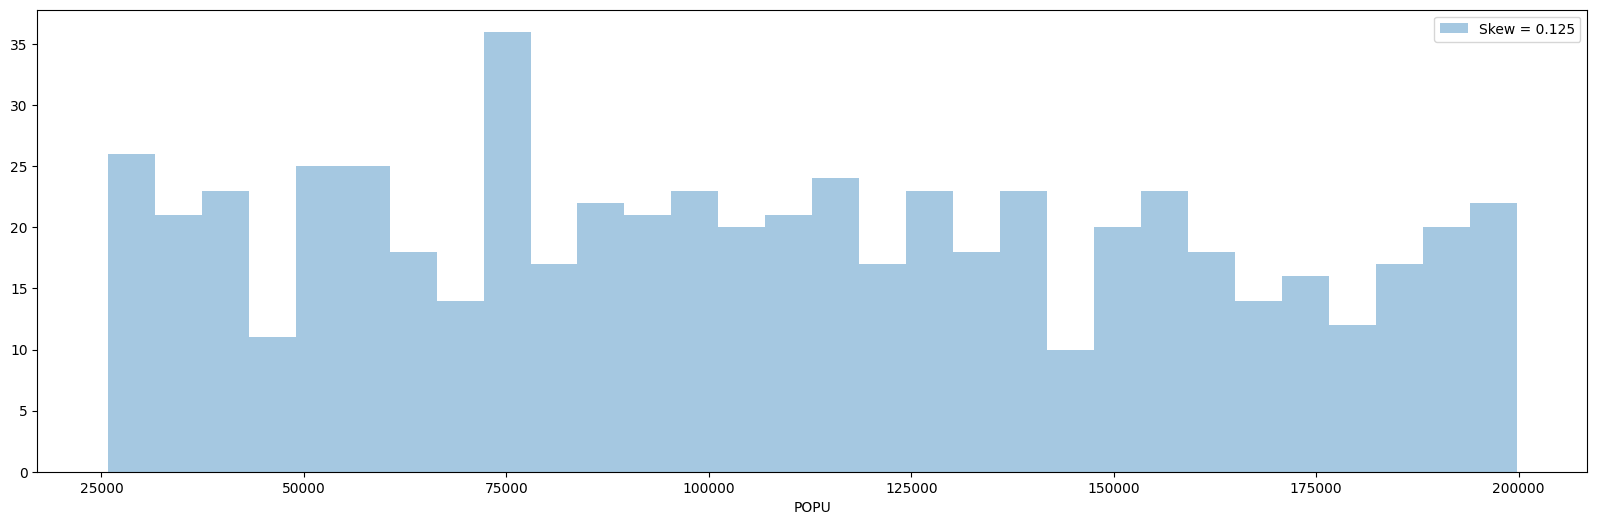

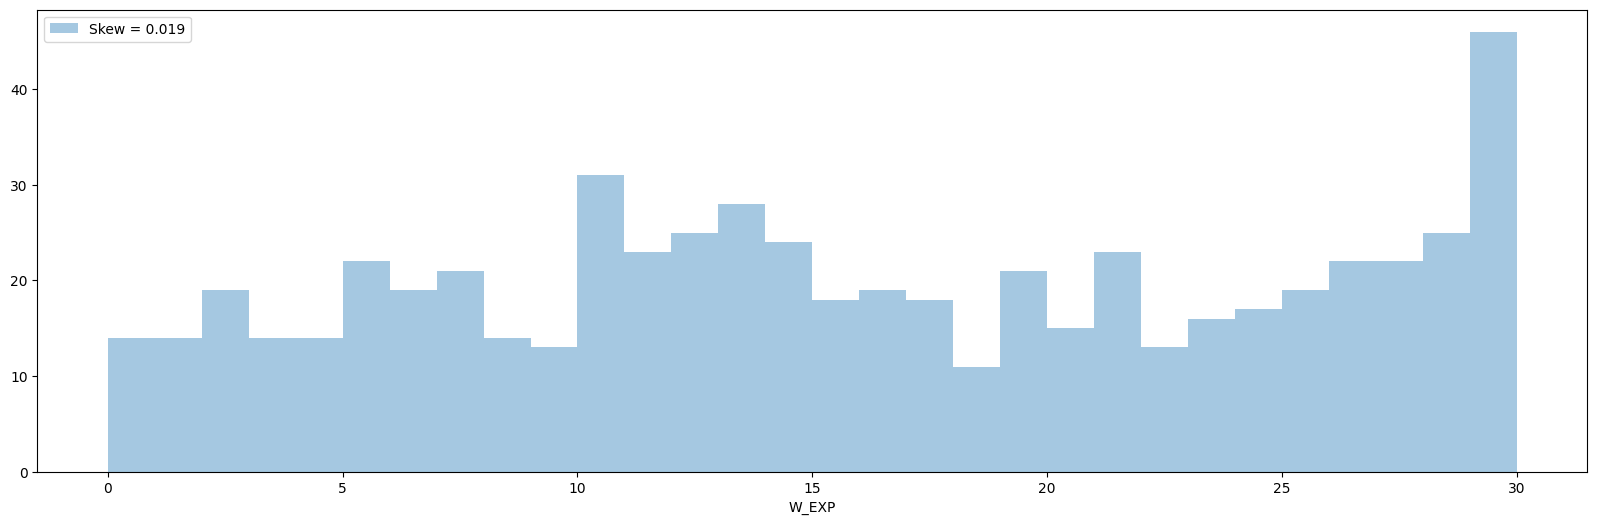

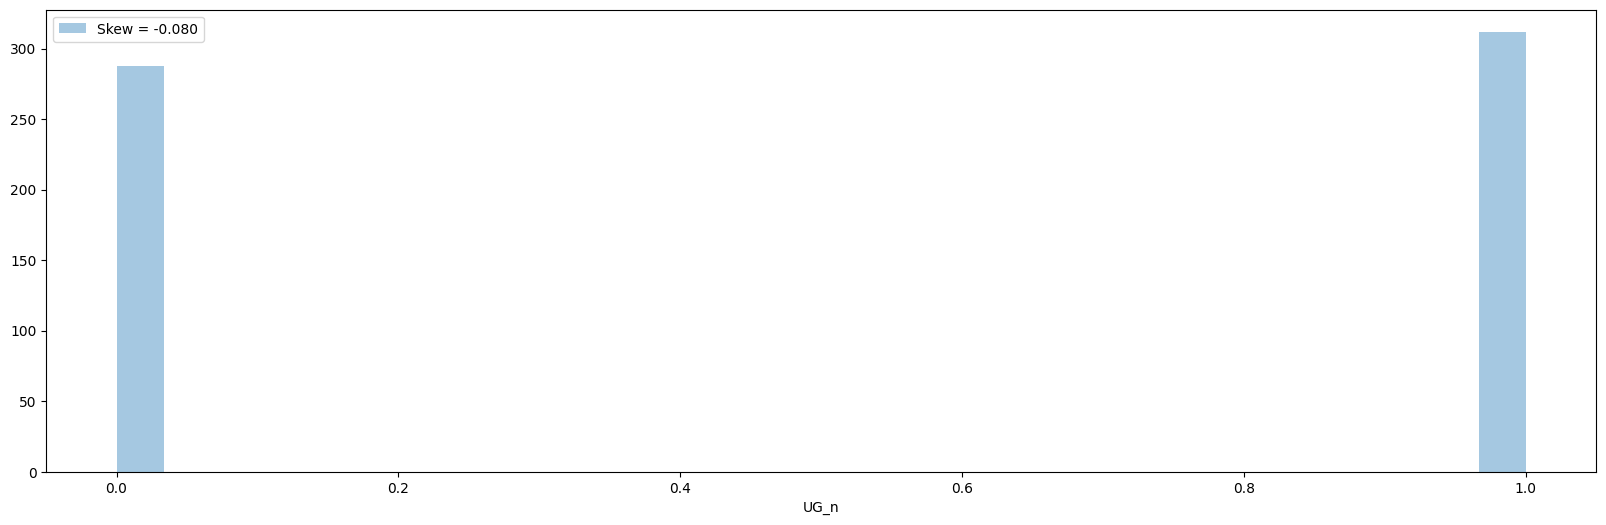

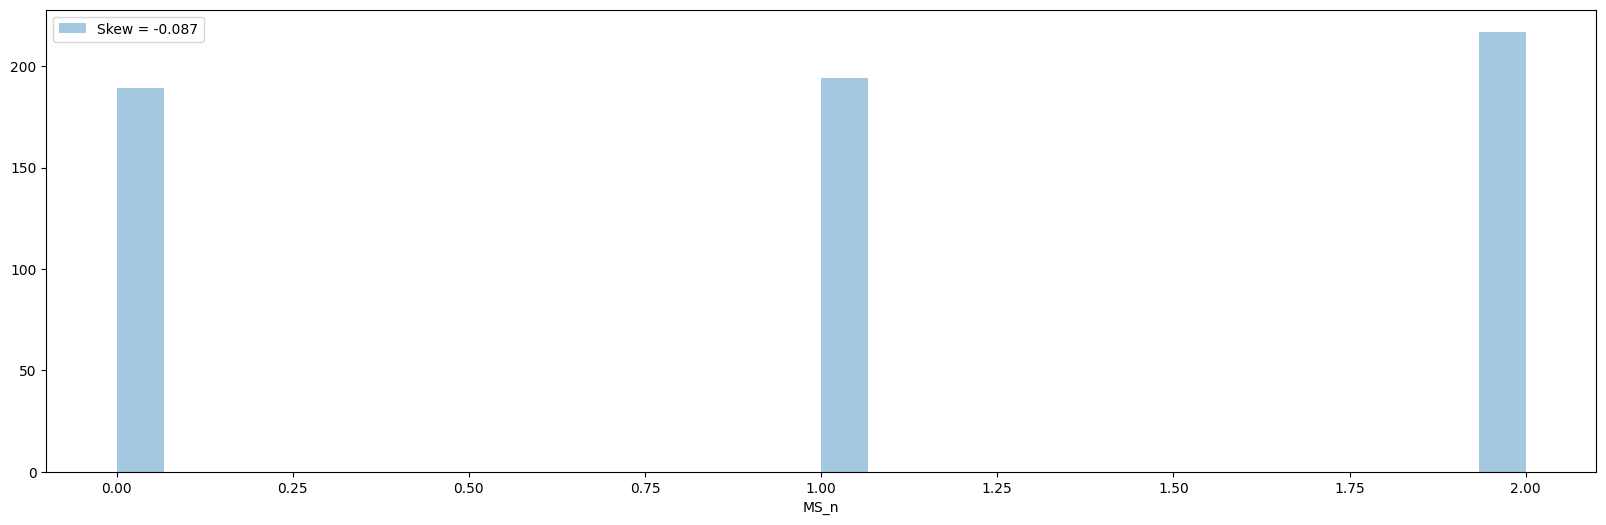

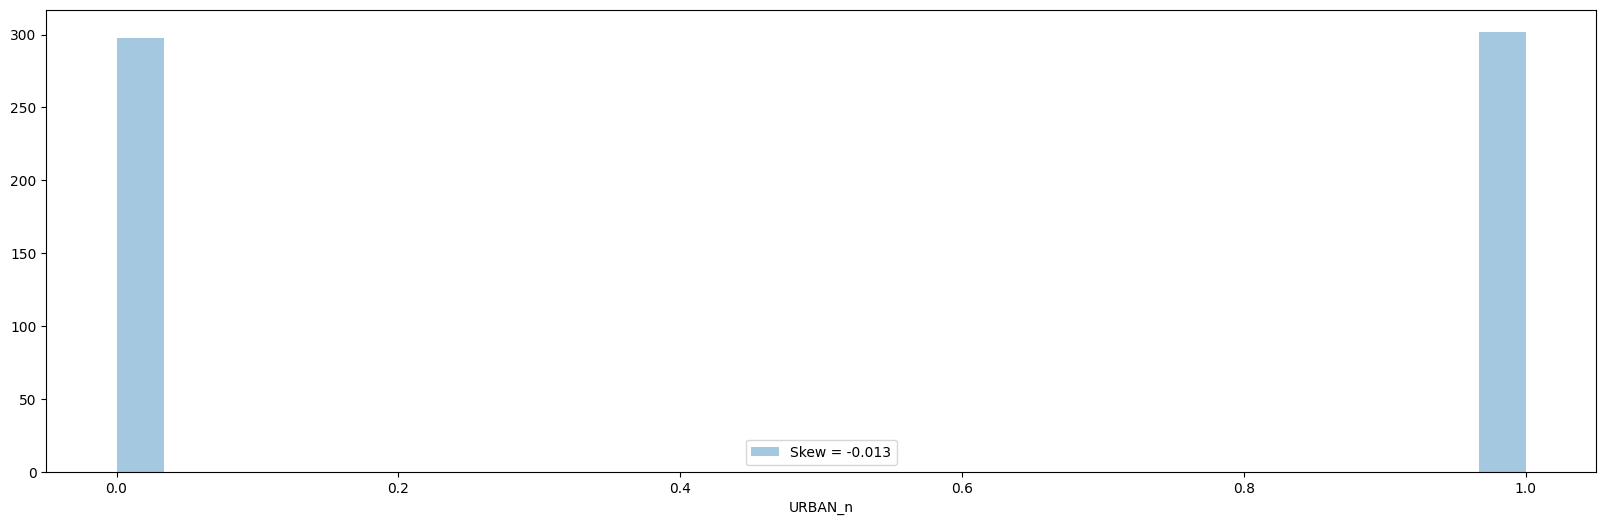

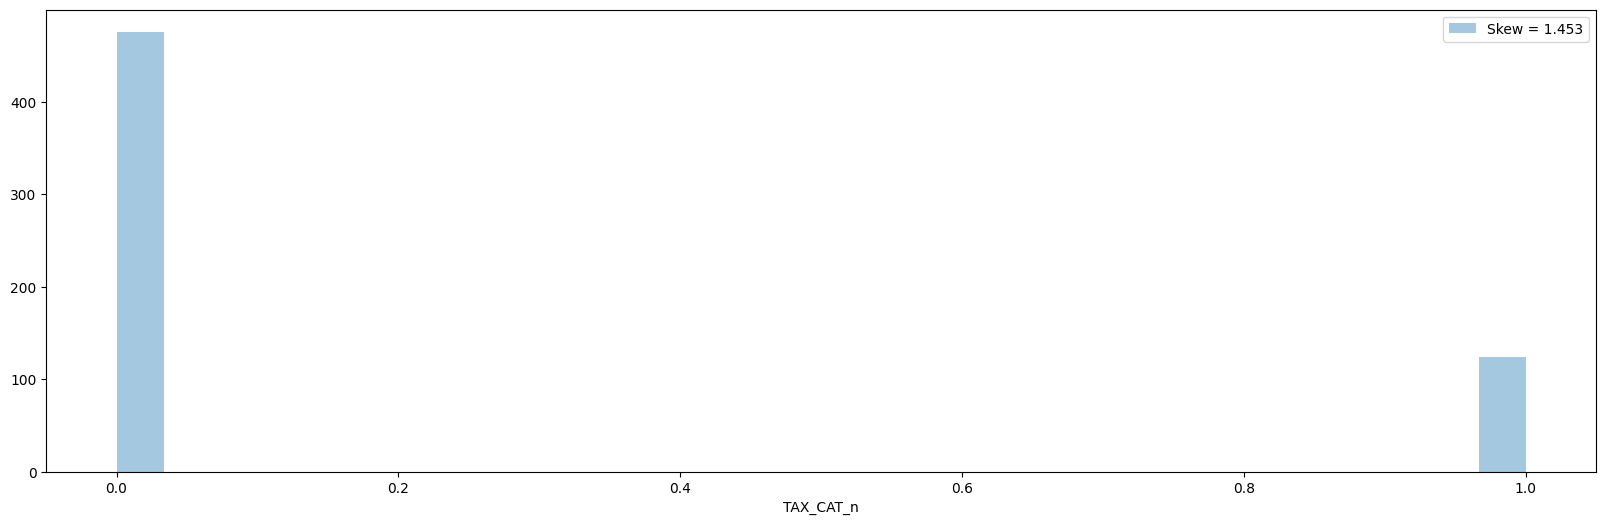

In [44]:
numerical_features=[feature for feature in fr_data.columns if fr_data[feature].dtypes != 'O']
for feat in numerical_features:
    f,ax = plt.subplots(figsize=(20,6))
    skew = fr_data[feat].skew()
    sns.distplot(fr_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### **Correlation Matrix** ###
Check for Assumption: Independent variables are independent of each other

In [45]:
fr_data.head()

POPU  W_EXP  UG_n  MS_n  URBAN_n  TAX_CAT_n
0   50047     10     0     2        1          0
1  134075     18     1     0        1          0
2  160205     30     0     1        1          0
3  193264     15     1     2        1          0
4   27533     28     0     1        0          0

In [46]:
fr_data.corr()

POPU     W_EXP      UG_n      MS_n   URBAN_n  TAX_CAT_n
POPU       1.000000  0.013135  0.079579 -0.001564 -0.040098   0.012225
W_EXP      0.013135  1.000000 -0.005362 -0.002213 -0.094559  -0.001972
UG_n       0.079579 -0.005362  1.000000  0.042407 -0.000267   0.012523
MS_n      -0.001564 -0.002213  0.042407  1.000000  0.064562   0.006081
URBAN_n   -0.040098 -0.094559 -0.000267  0.064562  1.000000   0.004830
TAX_CAT_n  0.012225 -0.001972  0.012523  0.006081  0.004830   1.000000

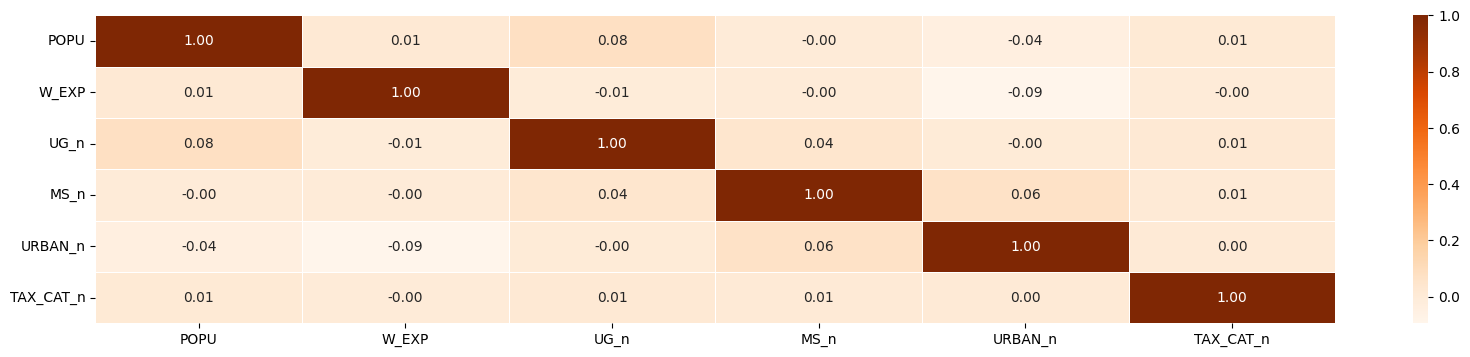

In [47]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(fr_data.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="Oranges",ax=ax)
plt.show()

Based on the heatmap we see very less correlation between the individual entities. So the issue of colinearity problem will not arise. 

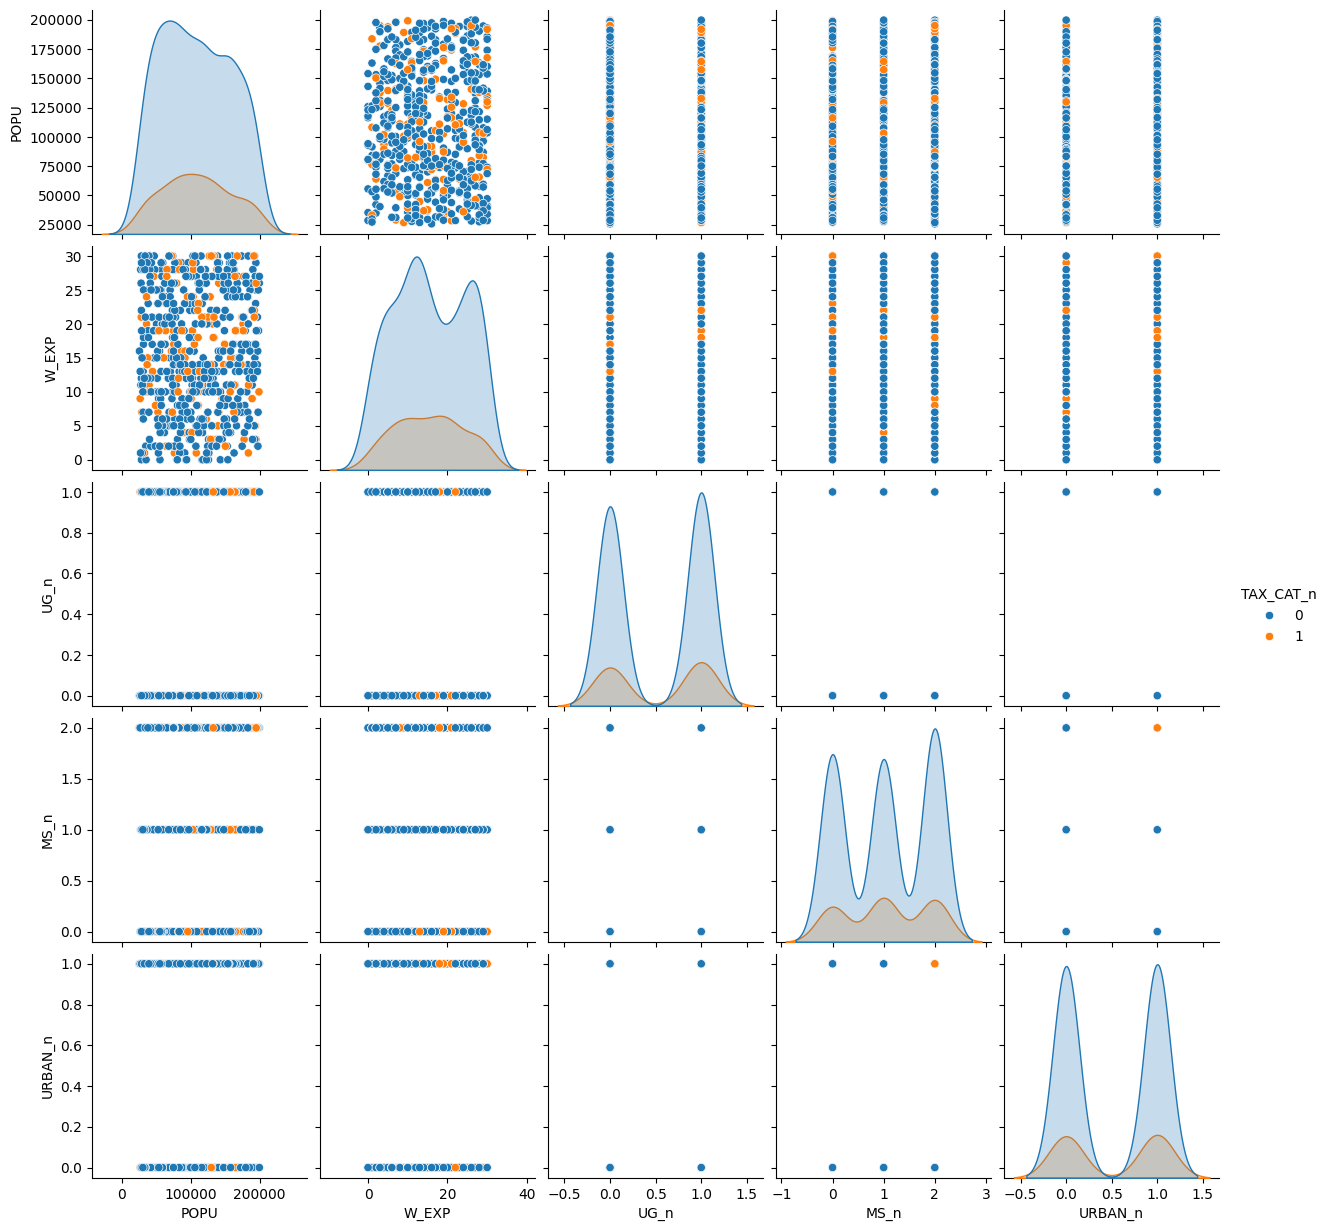

In [48]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(fr_data, hue='TAX_CAT_n')

### ***Function to get all the details for Accuracy, Classification Report and Confustion Matrix*** ###

In [49]:
# Function to get all the metrics like Accuracy Score, ROC_AUC, Classification Report and Confusion Matrix
# based on the classification model, train and test x and y values
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"ACCURACY: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1]) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"ACCURACY: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"ROC_AUC: {metrics.roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")

## **DECISION TREE** ##

## **Imbalanced Data** ##

### ***Categorizing Training and Testing Sets with testing sample size as 30%*** ###

In [50]:
# Splitting x and y into training and testing sets, testing sample size being 30%

from sklearn.model_selection import train_test_split
x_train_fraud, x_test_fraud, y_train_fraud, y_test_fraud = train_test_split(inputs_fraud, target_fraud, test_size=0.3)

In [51]:
inputs_fraud

POPU  W_EXP  UG_n  MS_n  URBAN_n
0     50047     10     0     2        1
1    134075     18     1     0        1
2    160205     30     0     1        1
3    193264     15     1     2        1
4     27533     28     0     1        0
..      ...    ...   ...   ...      ...
595   39492      7     1     0        1
596   55369      2     1     0        1
597  154058      0     0     0        1
598  180083     17     1     1        0
599  158137     16     0     0        0

[600 rows x 5 columns]

In [52]:
target_fraud

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TAX_CAT_n, Length: 600, dtype: int32

In [53]:
print("Shape of x_train_fraud: ",x_train_fraud.shape)
print("Shape of x_test_fraud: ", x_test_fraud.shape)
print("Shape of y_train_fraud: ",y_train_fraud.shape)
print("Shape of y_test_fraud: ",y_test_fraud.shape)

Shape of x_train_fraud:  (420, 5)
Shape of x_test_fraud:  (180, 5)
Shape of y_train_fraud:  (420,)
Shape of y_test_fraud:  (180,)


### **Training the Decision Tree Model with default parameters for Criteria and Max Depth** ###

In [54]:
# Preparing a Decision Trees model on training data set
from sklearn.tree import DecisionTreeClassifier
fraud_model = DecisionTreeClassifier()
fraud_model.fit(x_train_fraud, y_train_fraud)

DecisionTreeClassifier()

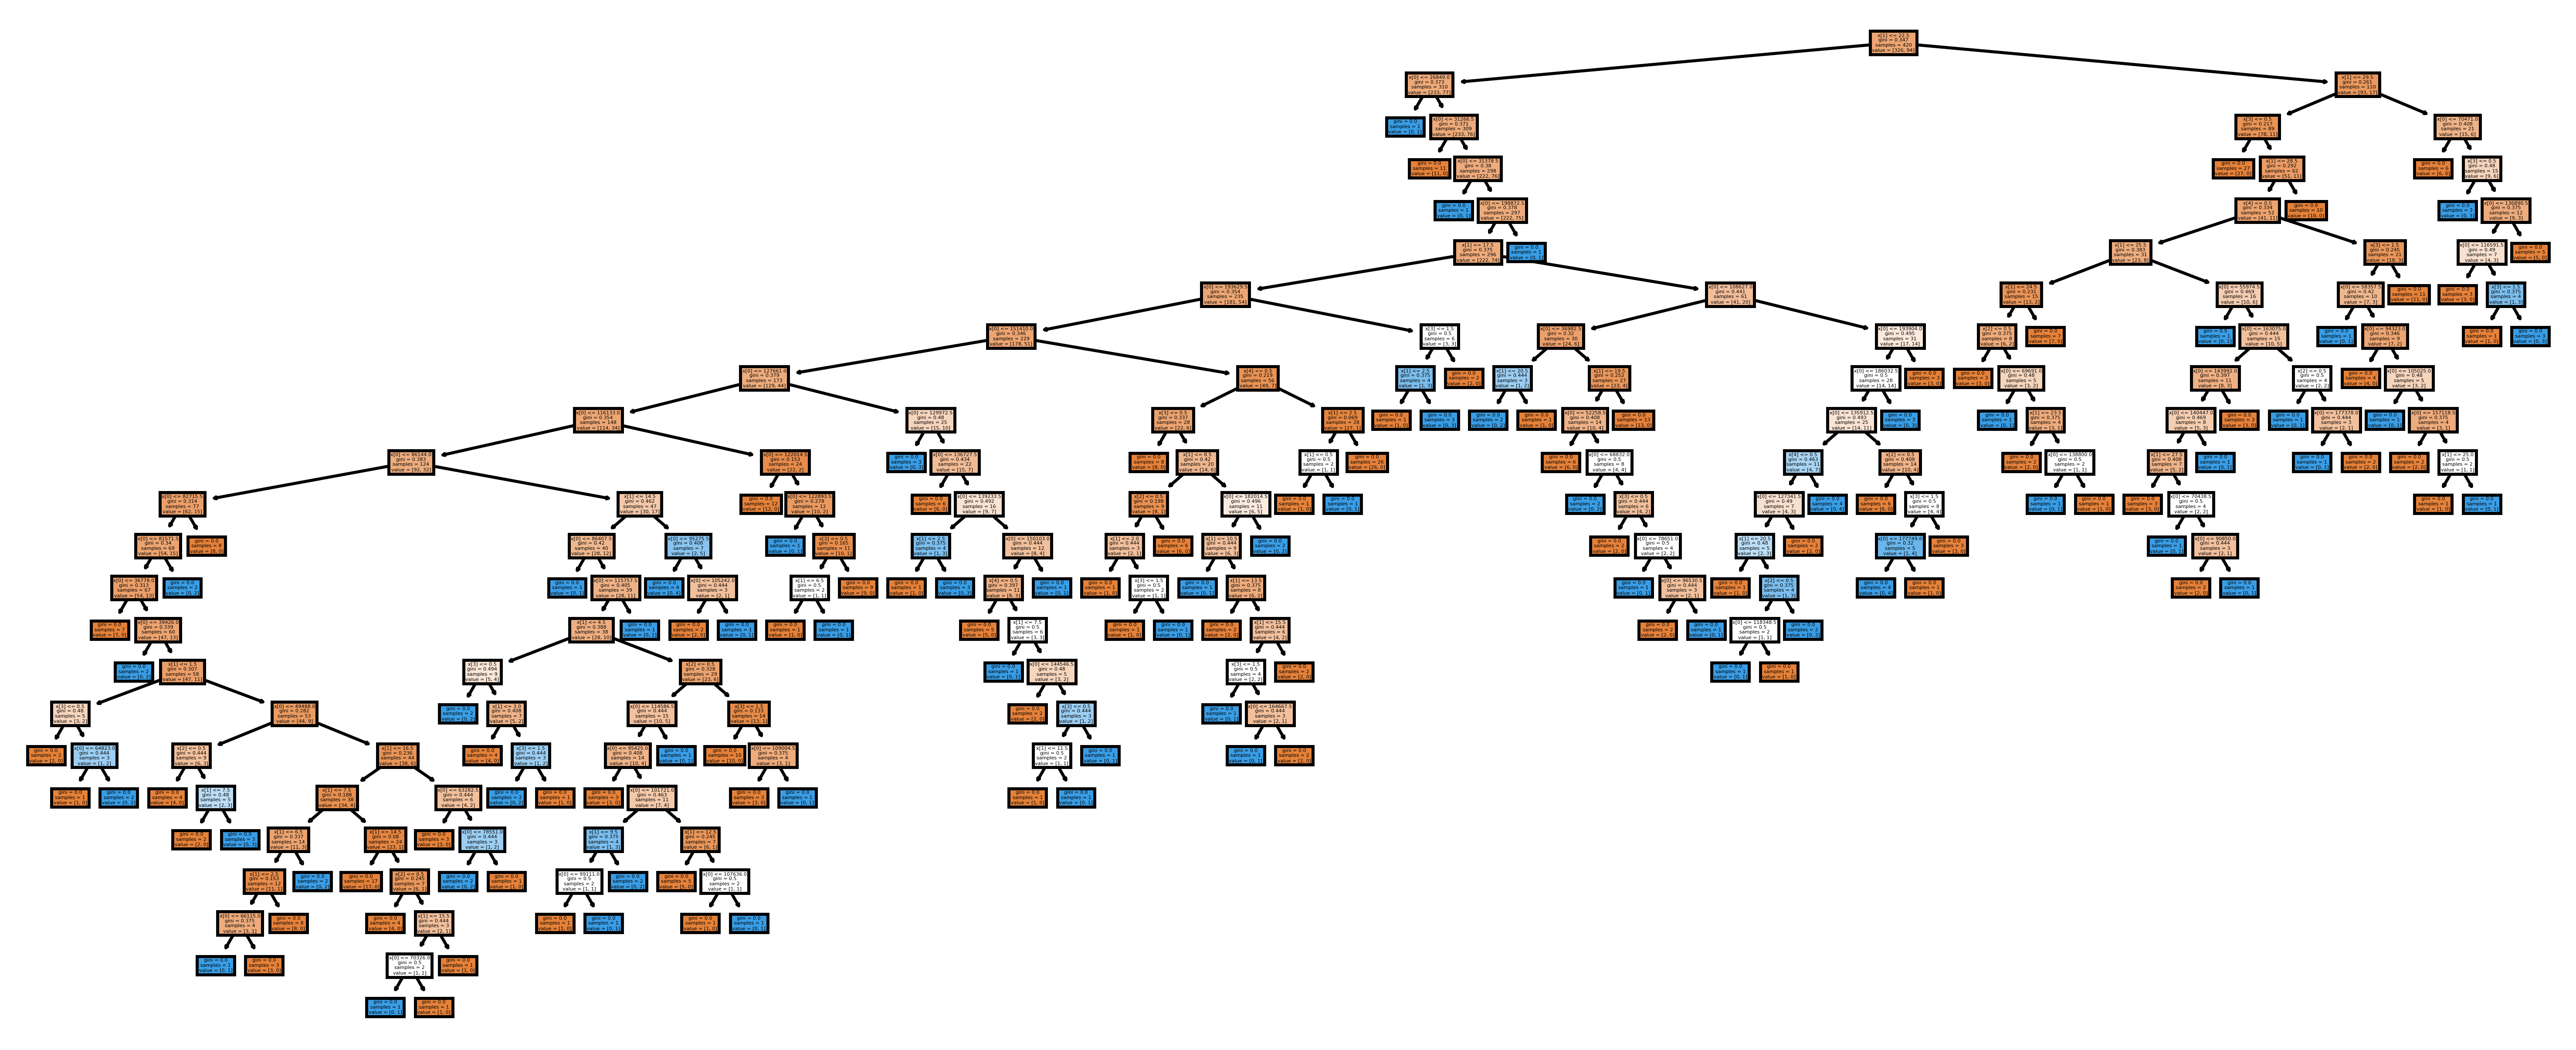

In [55]:
plt.figure(figsize=(15,6),dpi=500)
tree.plot_tree(fraud_model,filled=True)
plt.show()

In [56]:
# Making predictions on the testing set
fraud_y_pred = fraud_model.predict(x_test_fraud)
fraud_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0])

In [57]:
pd.crosstab(y_test_fraud,fraud_y_pred) # getting the 2 way table to understand the correct and wrong predictions. Actual 0 - but it is predicted as 1

col_0        0   1
TAX_CAT_n         
0          104  46
1           25   5

In [58]:
print_score(fraud_model, x_train_fraud, y_train_fraud, x_test_fraud, y_test_fraud, train=True)
print_score(fraud_model, x_train_fraud, y_train_fraud, x_test_fraud, y_test_fraud, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 100.00%

____________________________________________________________________

ROC_AUC: 100.00%

____________________________________________________________________

CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    326.0  94.0       1.0      420.0         420.0

____________________________________________________________________

CONFUSION MATRIX: 
 [[326   0]
 [  0  94]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 60.56%

____________________________________________________________________



In [59]:
# Calculation based on the 2 way matrix table
diag_1 = np.trace(pd.crosstab(y_test_fraud,fraud_y_pred))
total_1 = sum(pd.crosstab(y_test_fraud,fraud_y_pred).sum())
acc_1 = diag_1/total_1
print(f"The calculation done on the 2 way matrix table -\nThe sum of diagonal elements is {diag_1} and total elements is {total_1} and accuracy is {acc_1}") 

The calculation done on the 2 way matrix table -
The sum of diagonal elements is 109 and total elements is 180 and accuracy is 0.6055555555555555


*Checking accuracy using Metrics*

In [60]:
# Checking accuracy by comparing actual response values (y_test_fraud) with predicted
# response values (fraud_y_pred)
from sklearn import metrics
fraud_score = metrics.accuracy_score(y_test_fraud,fraud_y_pred)
print("Accuracy using metrics:", fraud_score)

Accuracy using metrics: 0.6055555555555555


*Checking accuracy using Alternate Method*

In [61]:
# Checking accuracy using alternate method
fraud_score_alt = fraud_model.score(x_test_fraud, y_test_fraud)
print("Accuracy using alternate method:", fraud_score_alt)

Accuracy using alternate method: 0.6055555555555555


In [62]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_fraud = metrics.accuracy_score(y_train_fraud, fraud_model.predict(x_train_fraud))
testing_acc_fraud = metrics.accuracy_score(y_test_fraud, fraud_model.predict(x_test_fraud))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_fraud}\nTesting Accuracy: {testing_acc_fraud}")

Accuracy using metrics-
Training Accuracy: 1.0
Testing Accuracy: 0.6055555555555555


In [63]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc_fraud = metrics.roc_auc_score(y_test_fraud, fraud_model.predict_proba(x_test_fraud)[:, 1])
print(f"The ROC_AUC value is {roc_auc_fraud}")

The ROC_AUC value is 0.43000000000000005


*Confusion Matrix*

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0]

The sum of diagonal elements is 109 and total elements is 180 and manually calculated score is 0.6055555555555555

The metrics accuracy score calculated is - 0.6055555555555555

Both the scores match.



col_0        0   1
TAX_CAT_n         
0          104  46
1           25   5

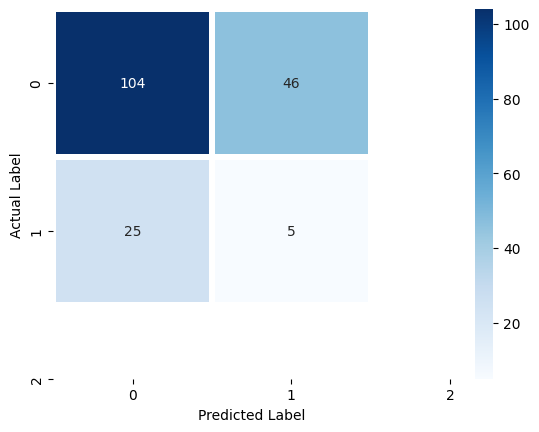

In [64]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
fraud_y_pred = fraud_model.predict(x_test_fraud)

pd.Series(fraud_y_pred).value_counts() # getting the count of each category
print(fraud_y_pred)
classnames = ['0','1','2']
confusionmatrix = confusion_matrix(y_test_fraud,fraud_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Blues",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")



diag_fraud = np.trace(confusionmatrix)
total_fraud = sum(sum(confusionmatrix))
maccs = diag_fraud/total_fraud
print(f"\nThe sum of diagonal elements is {diag_fraud} and total elements is {total_fraud} and manually calculated score is {maccs}\n") 

mascore = metrics.accuracy_score(y_test_fraud, fraud_y_pred)
print(f"The metrics accuracy score calculated is - {mascore}\n")
print("Both the scores match.\n")

pd.crosstab(y_test_fraud,fraud_y_pred) # getting the 2 way table to understand the correct and wrong predictions. Actual 0 - but it is predicted as 1

### **Pruning the decision tree** ###

In [65]:
# Pruning the decision tree
treepath_fraud = fraud_model.cost_complexity_pruning_path(x_train_fraud, y_train_fraud)
treepath_fraud

{'ccp_alphas': array([0.        , 0.00114087, 0.00141093, 0.0015873 , 0.0015873 ,
        0.00165079, 0.00178571, 0.00178571, 0.00178571, 0.00181406,
        0.00191799, 0.00195901, 0.00198413, 0.00204082, 0.0021164 ,
        0.0021645 , 0.00218254, 0.00220058, 0.00221088, 0.00229592,
        0.00238095, 0.00264632, 0.00270455, 0.00277778, 0.00281934,
        0.00285714, 0.00288998, 0.00302579, 0.00308931, 0.0031746 ,
        0.0031746 , 0.0031746 , 0.00335097, 0.00345679, 0.00357143,
        0.00357143, 0.00362812, 0.00366128, 0.00380626]),
 'impurities': array([0.        , 0.00456349, 0.0087963 , 0.0119709 , 0.01832011,
        0.02657407, 0.0301455 , 0.03728836, 0.04085979, 0.04267385,
        0.04650983, 0.07393601, 0.07790426, 0.08198589, 0.0883351 ,
        0.09266411, 0.09702918, 0.10143034, 0.10585211, 0.11044394,
        0.1128249 , 0.12341017, 0.13422838, 0.13978394, 0.14260328,
        0.14831757, 0.16565747, 0.17170906, 0.19951283, 0.20268744,
        0.20586204, 0.20903664

In [66]:
ccp_alphas_f, impurities_f = treepath_fraud.ccp_alphas, treepath_fraud.impurities

In [67]:
classifiers_f = []
for treepath_fraud.ccp_alphas in ccp_alphas_f:
    ti_prunedtree = DecisionTreeClassifier(random_state=1, ccp_alpha=treepath_fraud.ccp_alphas)
    ti_prunedtree.fit(x_train_fraud, y_train_fraud)
    classifiers_f.append(ti_prunedtree)

In [68]:
classifiers_f

[DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0011408730158730166, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0014109347442680775, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0015873015873015873, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0015873015873015873, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.001650793650793651, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0017857142857142857, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0017857142857142857, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0017857142857142857, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0018140589569160988, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0019179894179894178, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.0019590129958793547, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.001984126984126984, random_state=1),
 DecisionTreeClassifier(ccp_alpha=0.002040816326530613, random_state=1),


In [69]:
# Accuracy calculated for each of the alpha values
from sklearn import metrics
accuracy_train_f = [metrics.accuracy_score(y_train_fraud,sales_prunedtree.predict(x_train_fraud)) for sales_prunedtree in classifiers_f]
accuracy_test_f = [metrics.accuracy_score(y_test_fraud,sales_prunedtree.predict(x_test_fraud)) for sales_prunedtree in classifiers_f]

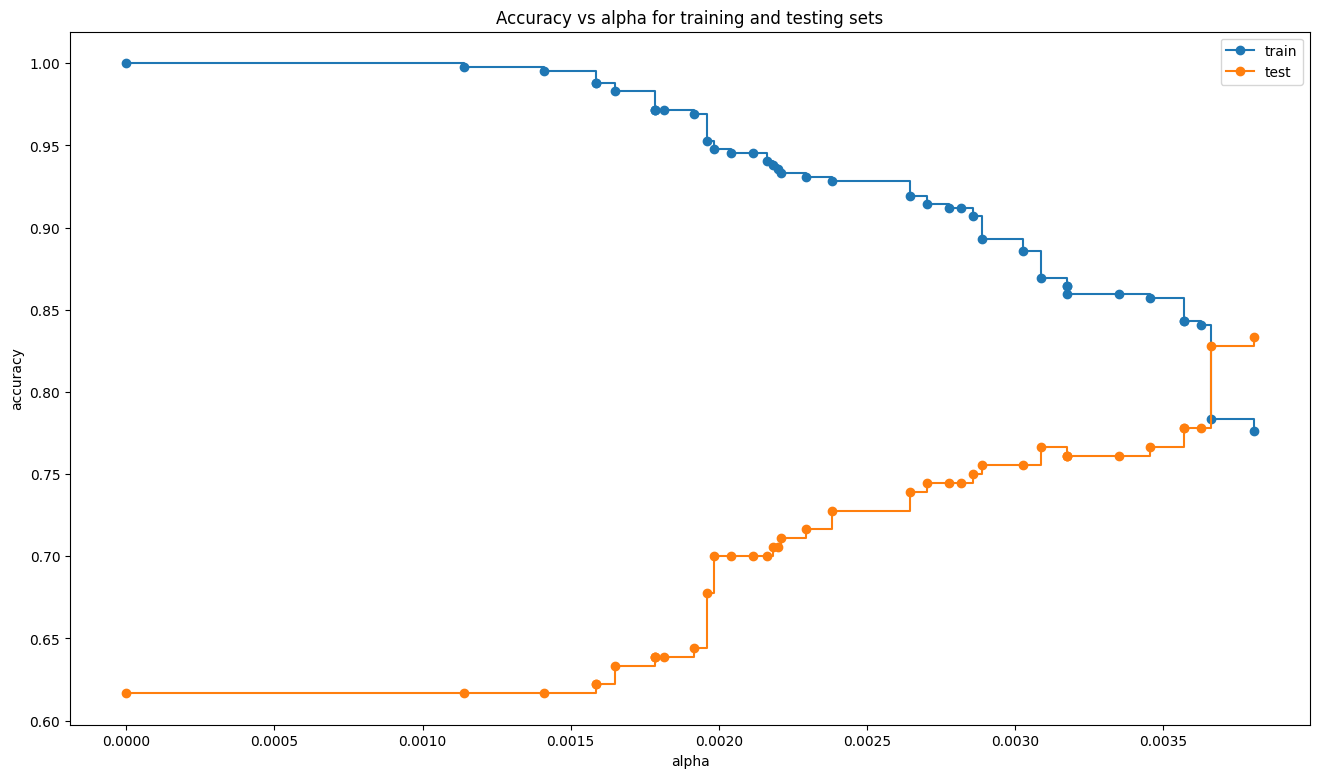

In [70]:
train_scores = [clf.score(x_train_fraud, y_train_fraud) for clf in classifiers_f]
test_scores = [clf.score(x_test_fraud, y_test_fraud) for clf in classifiers_f]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_f, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas_f, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

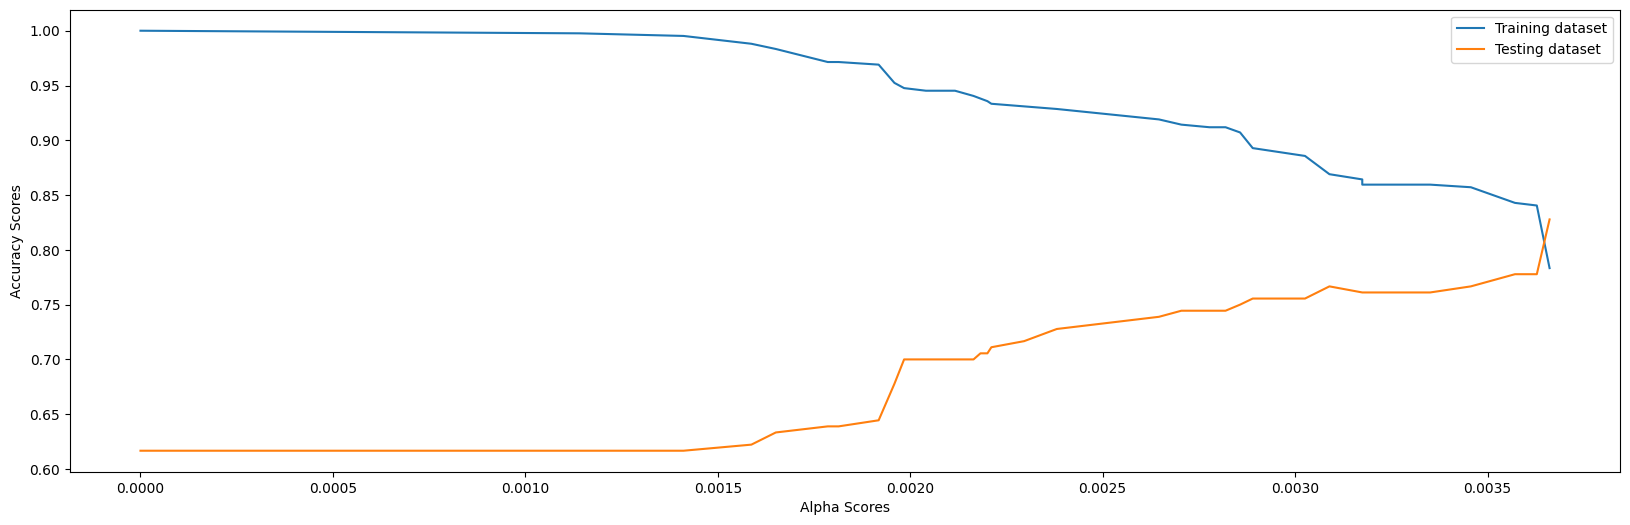

In [71]:
# Plotting the alpha scores and the accuracy
plt.figure(figsize=(20,6))
plt.plot(ccp_alphas_f[:-1],accuracy_train_f[:-1],label="Training dataset")
plt.plot(ccp_alphas_f[:-1],accuracy_test_f[:-1],label="Testing dataset")

plt.xlabel("Alpha Scores")
plt.ylabel("Accuracy Scores")
plt.legend()

#### *Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other* ####

In [72]:
fraud_model_1 = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.0037913415213149857)
fraud_model_1.fit(x_train_fraud,y_train_fraud)

DecisionTreeClassifier(ccp_alpha=0.0037913415213149857)

In [73]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_f = metrics.accuracy_score(y_train_fraud, fraud_model_1.predict(x_train_fraud))
testing_acc_f = metrics.accuracy_score(y_test_fraud, fraud_model_1.predict(x_test_fraud))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_f}\nTesting Accuracy: {testing_acc_f}")

Accuracy using metrics-
Training Accuracy: 0.7833333333333333
Testing Accuracy: 0.8277777777777777


Text(50.722222222222214, 0.5, 'Actual Label')

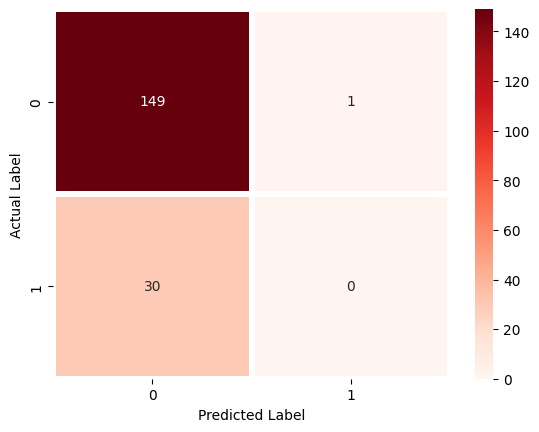

In [74]:
classnames = ['0','1']
confusionmatrix = confusion_matrix(y_test_fraud,fraud_model_1.predict(x_test_fraud))
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Reds",linewidths=3)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [75]:
# Calculation based on the 2 way matrix table
diag_f_1 = np.trace(confusionmatrix)
total_f_1 = sum(sum(confusionmatrix))
acc_f_1 = diag_f_1/total_f_1
print(f"The calculation done on the 2 way matrix table -\nThe sum of diagonal elements is {diag_f_1} and total elements is {total_f_1} and accuracy is {acc_f_1}") 

The calculation done on the 2 way matrix table -
The sum of diagonal elements is 149 and total elements is 180 and accuracy is 0.8277777777777777


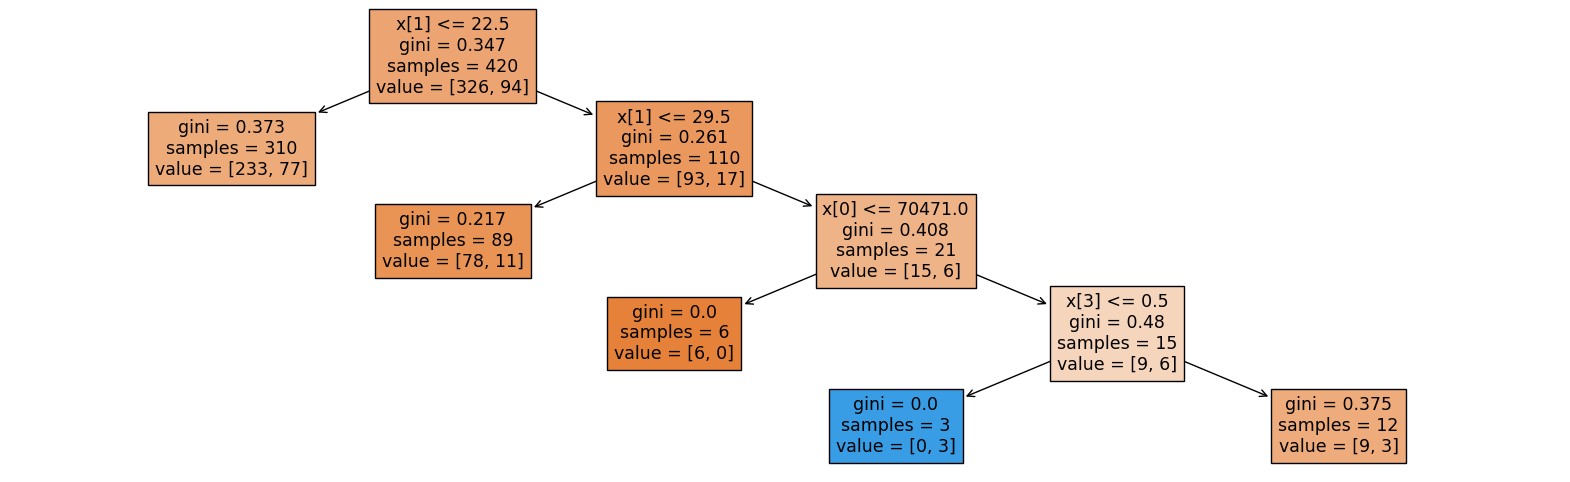

In [76]:
plt.figure(figsize=(20,6))
tree.plot_tree(fraud_model_1,filled=True)
plt.show()

### ***Categorizing Training and Testing Sets with test sample size as 20%*** ###

In [77]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: x_train_comp_2, x_test_comp_2,y_train_comp_2,y_test_comp_2

from sklearn.model_selection import train_test_split
x_train_fraud_2, x_test_fraud_2,y_train_fraud_2,y_test_fraud_2 = train_test_split(inputs_fraud, target_fraud, test_size=0.2, random_state=40)

In [78]:
print("Shape of x_train_fraud_2: ",x_train_fraud_2.shape)
print("Shape of x_test_fraud_2: ", x_test_fraud_2.shape)
print("Shape of y_train_fraud_2: ",y_train_fraud_2.shape)
print("Shape of y_test_fraud_2: ",y_test_fraud_2.shape)

Shape of x_train_fraud_2:  (480, 5)
Shape of x_test_fraud_2:  (120, 5)
Shape of y_train_fraud_2:  (480,)
Shape of y_test_fraud_2:  (120,)


### **Building the Decision Tree Classifier using Entropy Criteria** ###

*Training the model*

In [79]:
fraud_model_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
fraud_model_2.fit(x_train_fraud_2,y_train_fraud_2)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(0.3, 0.625, 'x[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(0.2, 0.375, 'x[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.7, 0.625, 'x[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'x[0] <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]'),
 Text(0.9, 0.125, 'entropy = 0.675\nsamples = 169\nvalue = [139, 30]')]

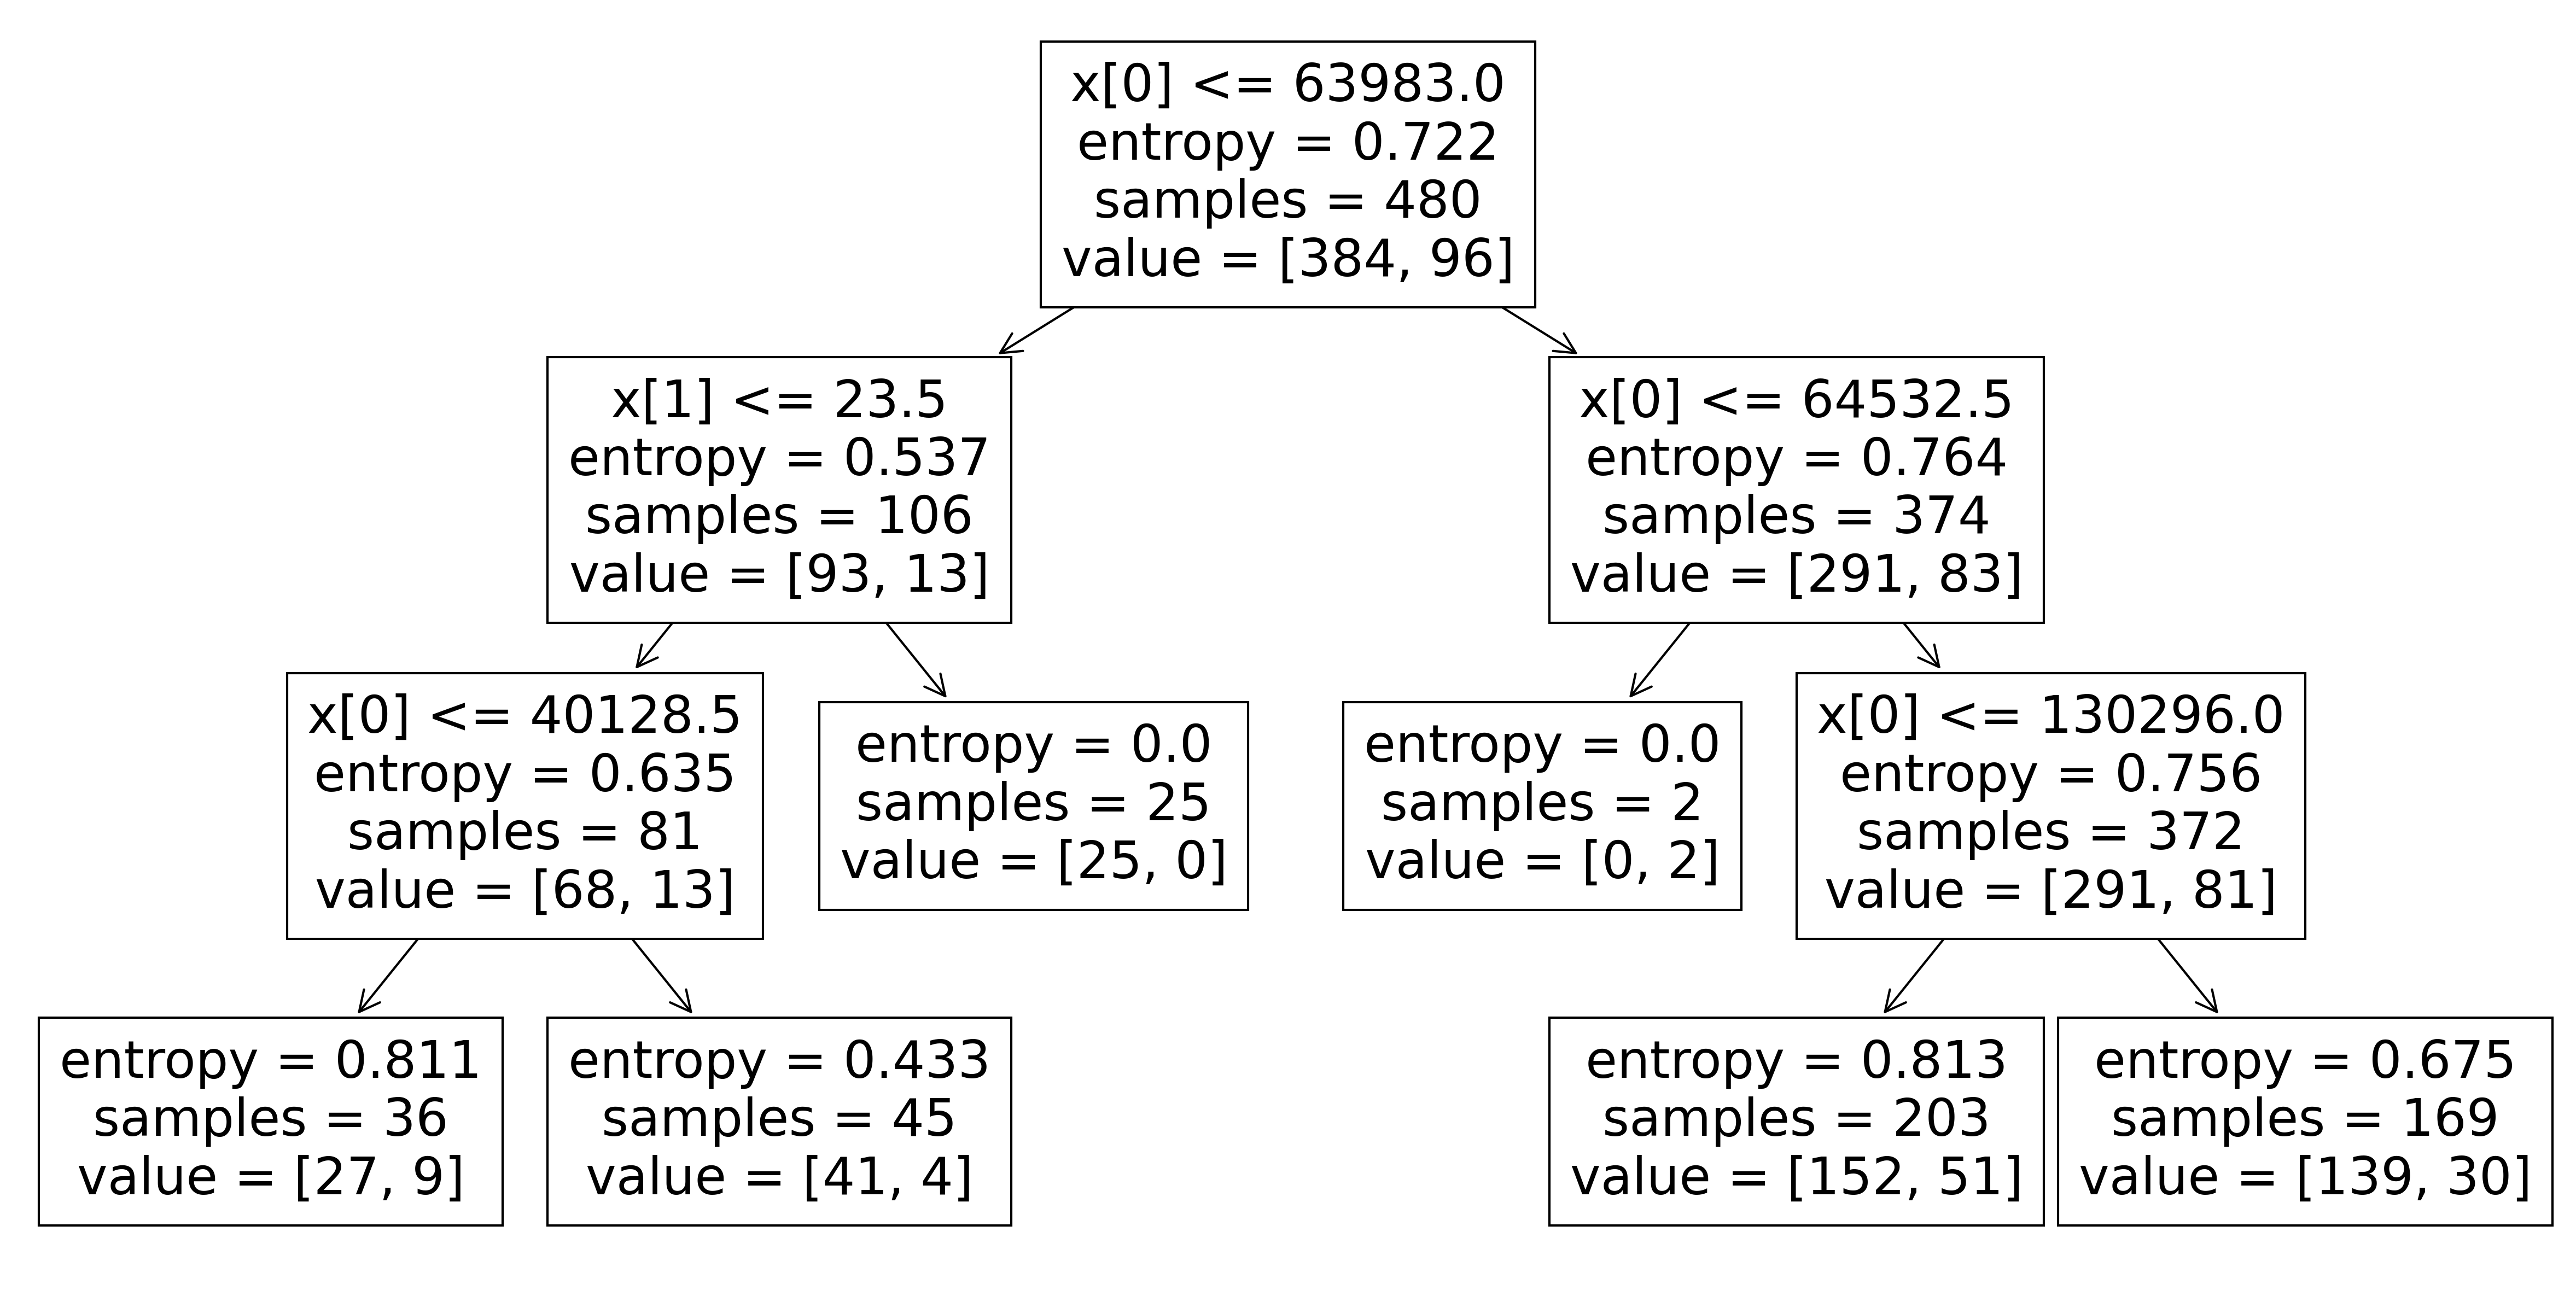

In [80]:
# Plot the decision tree

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(fraud_model_2)

In [81]:
y_train_fraud_2.value_counts()

TAX_CAT_n
0    384
1     96
Name: count, dtype: int64

[Text(0.5, 0.875, 'POPU <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]\nclass = Good'),
 Text(0.3, 0.625, 'W_EXP <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]\nclass = Good'),
 Text(0.2, 0.375, 'POPU <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]\nclass = Good'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]\nclass = Good'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]\nclass = Good'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = Good'),
 Text(0.7, 0.625, 'POPU <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]\nclass = Good'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Risky'),
 Text(0.8, 0.375, 'POPU <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]\nclass = Good'),
 Text(0.7, 0.125, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]\nclass = Good'),
 Text(0.9, 0.125, 'entropy = 0.675\nsamples = 169\nvalue = [139, 30]\nclass 

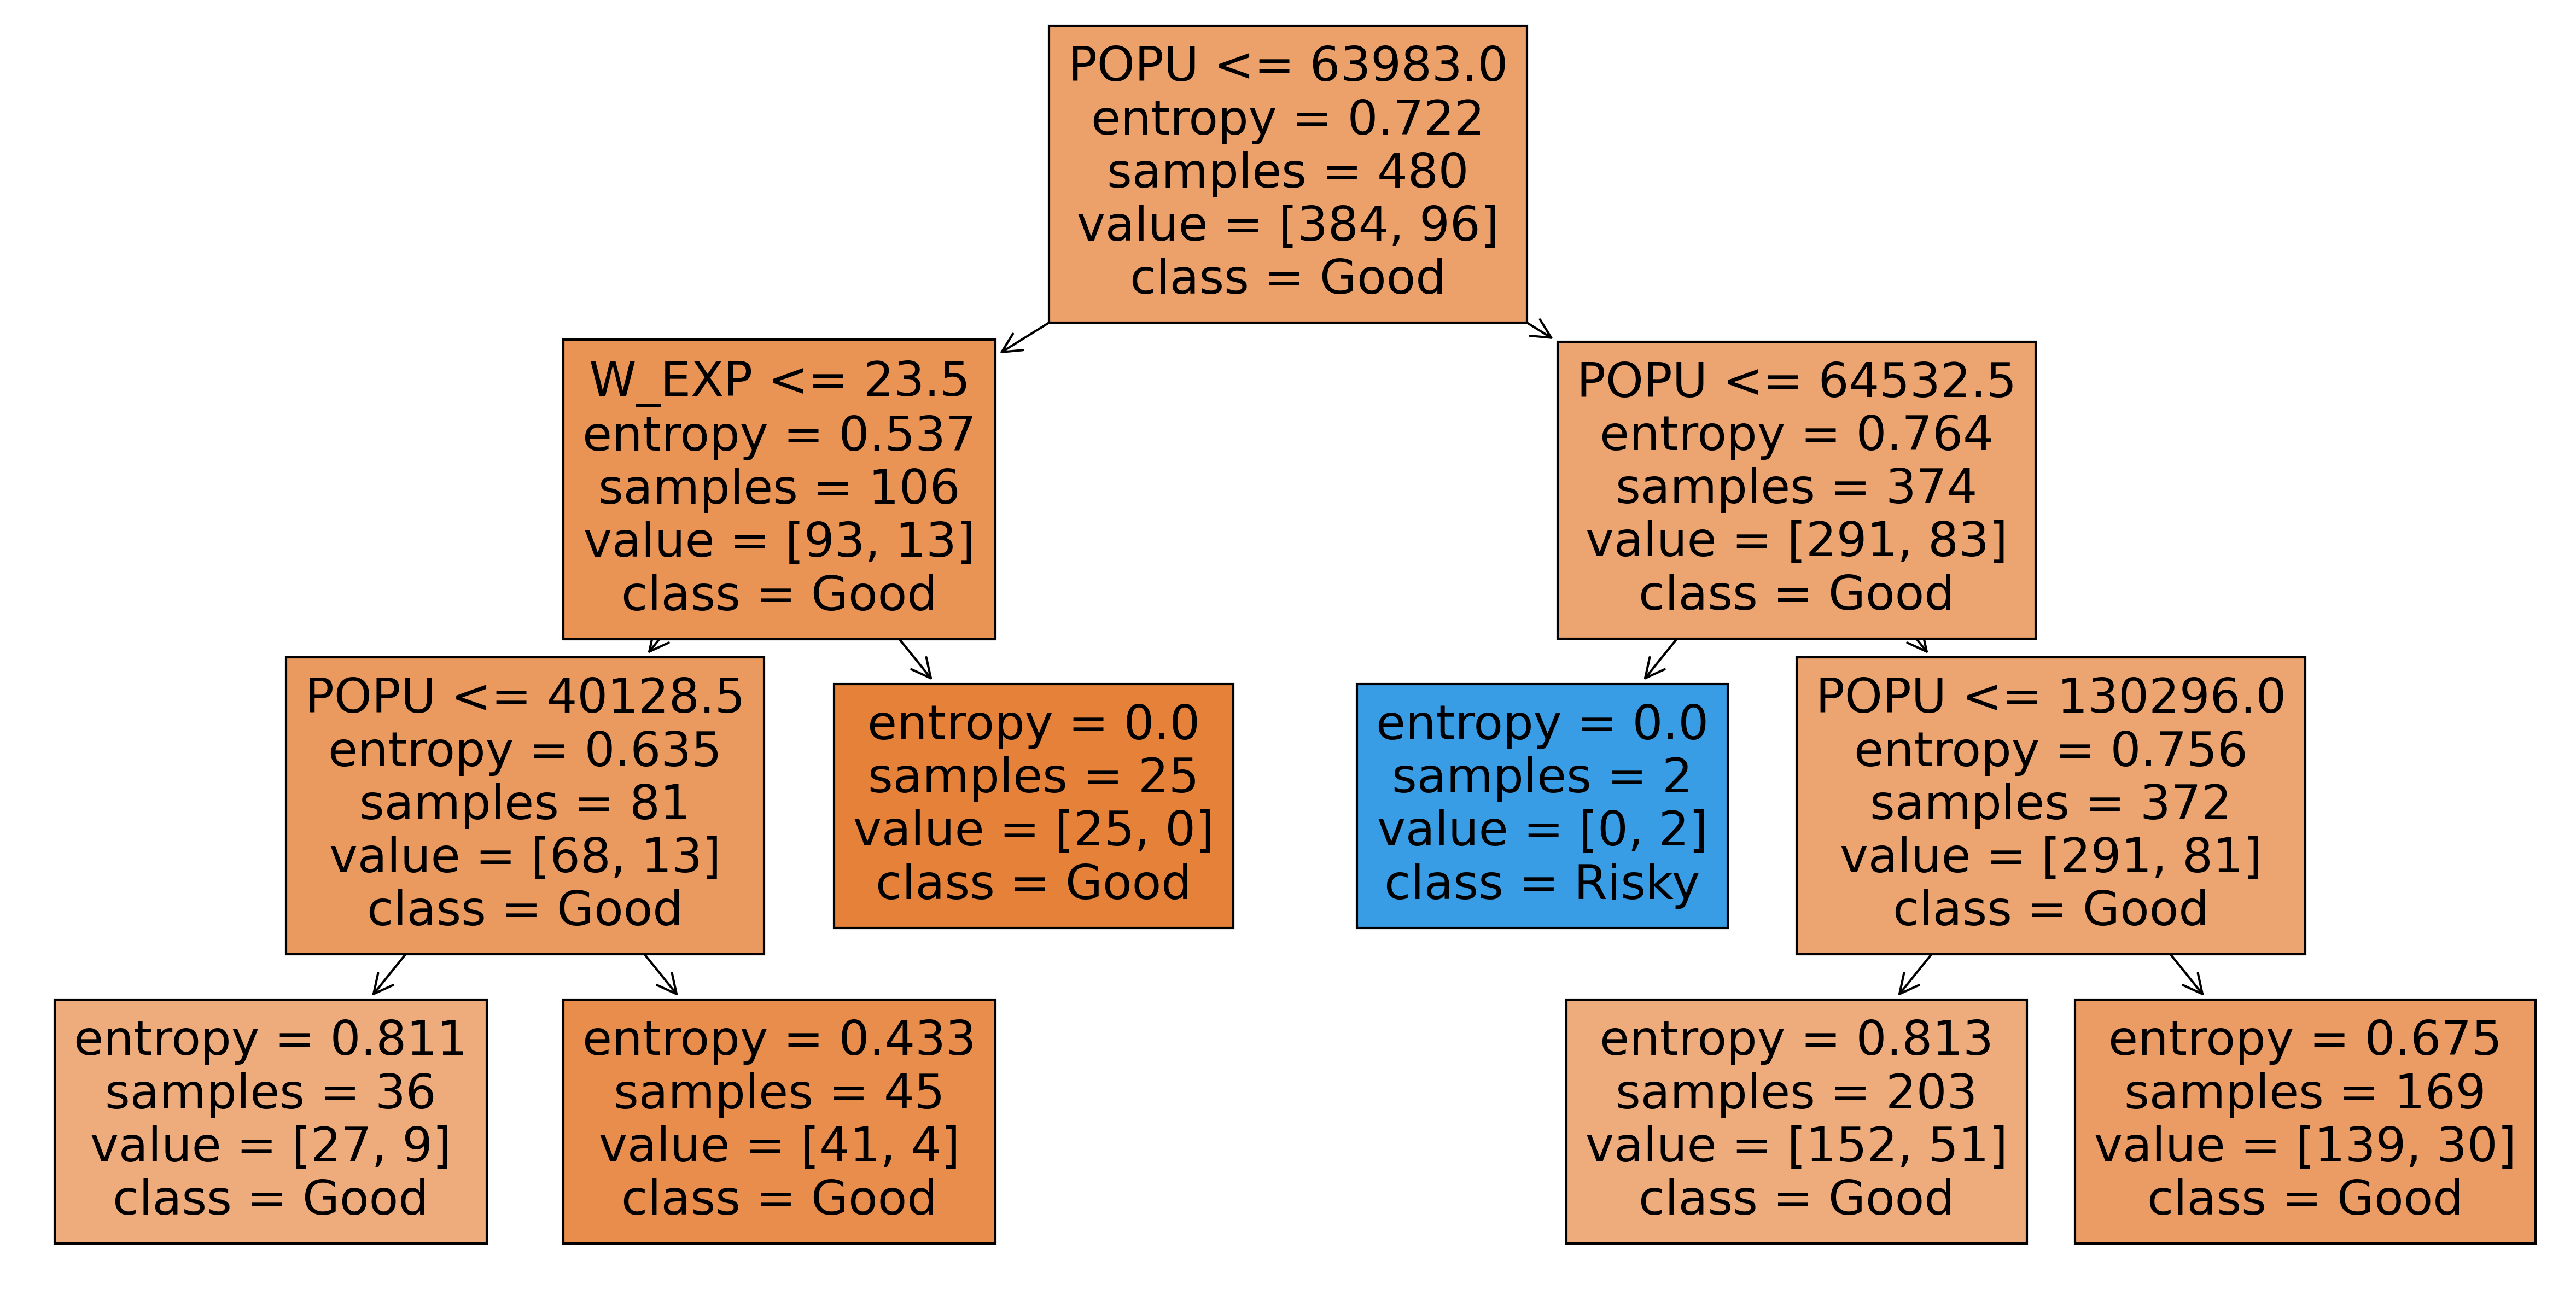

In [82]:
fn=['POPU','W_EXP','UG_n','MS_n','URBAN_n']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
tree.plot_tree(fraud_model_2, feature_names = fn, class_names=cn, filled = True)

In [83]:
# Predicting on test data
fraud_pred_2 = fraud_model_2.predict(x_test_fraud_2) # predicting on test data set
fraud_pred_2


y_test_fraud_2

159    0
307    0
253    0
528    0
137    1
      ..
102    0
577    0
18     0
560    0
62     0
Name: TAX_CAT_n, Length: 120, dtype: int32

In [84]:
pd.Series(fraud_pred_2).value_counts() # getting the count of each category

0    120
Name: count, dtype: int64

In [85]:
pd.crosstab(y_test_fraud_2,fraud_pred_2) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0       0
TAX_CAT_n    
0          92
1          28

In [86]:
print_score(fraud_model_2, x_train_fraud_2, y_train_fraud_2, x_test_fraud_2, y_test_fraud_2, train=True)
print_score(fraud_model_2, x_train_fraud_2, y_train_fraud_2, x_test_fraud_2, y_test_fraud_2, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 80.42%

____________________________________________________________________

ROC_AUC: 61.55%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803347   1.000000  0.804167    0.901674      0.842678
recall       1.000000   0.020833  0.804167    0.510417      0.804167
f1-score     0.890951   0.040816  0.804167    0.465884      0.720924
support    384.000000  96.000000  0.804167  480.000000    480.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[384   0]
 [ 94   2]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 76.67%

_________________

In [87]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_f_2 = metrics.accuracy_score(y_test_fraud_2,fraud_pred_2)
print("Accuracy using metrics:", accuracy_pred_f_2)

Accuracy using metrics: 0.7666666666666667


In [88]:
# Calculating the accuracy using numpy mean
accuracy_pred_f_2 = np.mean(fraud_pred_2==y_test_fraud_2)
print(f"The accuracy using numpy mean is {accuracy_pred_f_2}")

The accuracy using numpy mean is 0.7666666666666667


In [89]:
# Checking accuracy using alternate method
accuracy_pred_f_2 = fraud_model_2.score(x_test_fraud_2, y_test_fraud_2)
print("Accuracy using alternate method:", accuracy_pred_f_2)

Accuracy using alternate method: 0.7666666666666667


In [90]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_f_2 = metrics.accuracy_score(y_train_fraud_2, fraud_model_2.predict(x_train_fraud_2))
testing_acc_f_2 = metrics.accuracy_score(y_test_fraud_2, fraud_model_2.predict(x_test_fraud_2))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_f_2}\nTesting Accuracy: {testing_acc_f_2}")

Accuracy using metrics-
Training Accuracy: 0.8041666666666667
Testing Accuracy: 0.7666666666666667


In [91]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc_f_2 = metrics.roc_auc_score(y_test_fraud_2, fraud_model_2.predict_proba(x_test_fraud_2)[:, 1])
print(f"The ROC_AUC value is {roc_auc_f_2}")

The ROC_AUC value is 0.3781055900621118


### **Building Decision Tree Classifier (CART) using Gini Criteria** ###

In [92]:
from sklearn.tree import DecisionTreeClassifier
fraud_model_3 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [93]:
fraud_model_3.fit(x_train_fraud_2, y_train_fraud_2)

DecisionTreeClassifier(max_depth=3)

In [94]:
# Prediction and computing the accuracy
fraud_pred_3=fraud_model_3.predict(x_test_fraud_2)
np.mean(fraud_pred_3==y_test_fraud_2)

0.7583333333333333

In [95]:
print_score(fraud_model_3, x_train_fraud_2, y_train_fraud_2, x_test_fraud_2, y_test_fraud_2, train=True)
print_score(fraud_model_3, x_train_fraud_2, y_train_fraud_2, x_test_fraud_2, y_test_fraud_2, train=False)


**********************************************************
                  TRAINING RESULT
**********************************************************

ACCURACY: 80.62%

____________________________________________________________________

ROC_AUC: 61.33%

____________________________________________________________________

CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.805031   1.000000   0.80625    0.902516      0.844025
recall       1.000000   0.031250   0.80625    0.515625      0.806250
f1-score     0.891986   0.060606   0.80625    0.476296      0.725710
support    384.000000  96.000000   0.80625  480.000000    480.000000

____________________________________________________________________

CONFUSION MATRIX: 
 [[384   0]
 [ 93   3]]


**********************************************************
                  TESTING RESULT
**********************************************************

ACCURACY: 75.83%

_________________

In [96]:
pd.crosstab(y_test_fraud_2,fraud_pred_3) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0       0  1
TAX_CAT_n       
0          91  1
1          28  0

In [97]:
# Checking accuracy by comparing metrics method
from sklearn import metrics
accuracy_pred_f_3 = metrics.accuracy_score(y_test_fraud_2,fraud_pred_3)
print("Accuracy using metrics:", accuracy_pred_f_3)

Accuracy using metrics: 0.7583333333333333


In [98]:
# Calculating the accuracy
accuracy_pred_f_3 = np.mean(fraud_pred_3==y_test_fraud_2)
print(f"The accuracy is {accuracy_pred_f_3}")

The accuracy is 0.7583333333333333


In [99]:
# Checking accuracy using alternate method
accuracy_pred_f_3 = fraud_model_2.score(x_test_fraud_2, y_test_fraud_2)
print("Accuracy using alternate method:", accuracy_pred_f_3)

Accuracy using alternate method: 0.7666666666666667


In [100]:
# Accuracies for both Training and Testing Samples
from sklearn import metrics
training_acc_f_3 = metrics.accuracy_score(y_train_fraud_2, fraud_model_3.predict(x_train_fraud_2))
testing_acc_f_3 = metrics.accuracy_score(y_test_fraud_2, fraud_model_3.predict(x_test_fraud_2))
print(f"Accuracy using metrics-\nTraining Accuracy: {training_acc_f_3}\nTesting Accuracy: {testing_acc_f_3}")

Accuracy using metrics-
Training Accuracy: 0.80625
Testing Accuracy: 0.7583333333333333


In [101]:
# Checking the ROC_AUC
from sklearn.tree import DecisionTreeClassifier
roc_auc_f_3 = metrics.roc_auc_score(y_test_fraud_2, fraud_model_3.predict_proba(x_test_fraud_2)[:, 1])
print(f"The ROC_AUC value is {roc_auc_f_3}")

The ROC_AUC value is 0.37907608695652173


              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



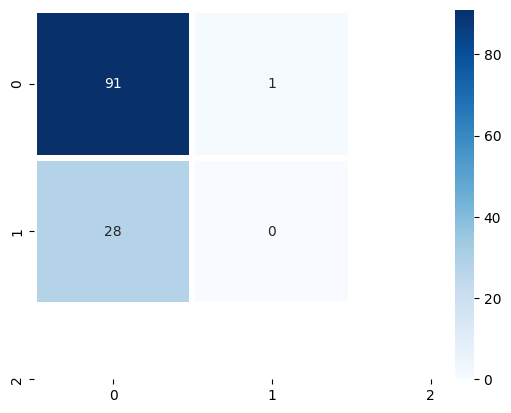

In [102]:
classnames = ['0','1','2']
sns.heatmap(confusion_matrix(y_test_fraud_2, fraud_pred_3),annot=True,yticklabels=classnames,xticklabels=classnames,fmt='d',cmap="Blues",linewidths=3)
print(classification_report(y_test_fraud_2, fraud_pred_3))

### ***Feature Selection Technique after evaluation of scores*** ###

In [103]:
# split into input (X) and output (y) variables
fs_fraud_x = fr_data.iloc[:, :-1]
fs_fraud_y =  fr_data.TAX_CAT_n

In [104]:
fs_fraud_x.head()

POPU  W_EXP  UG_n  MS_n  URBAN_n
0   50047     10     0     2        1
1  134075     18     1     0        1
2  160205     30     0     1        1
3  193264     15     1     2        1
4   27533     28     0     1        0

In [105]:
fs_fraud_y.head()

0    0
1    0
2    0
3    0
4    0
Name: TAX_CAT_n, dtype: int32

In [106]:
# Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [107]:
# Feature extraction
test_comp_feat = SelectKBest(score_func=chi2, k=4)
fit_comp_feat = test_comp_feat.fit(fs_fraud_x, fs_fraud_y)

In [108]:
# summarize scores
scores_comp_feat = fit_comp_feat.scores_
features_comp = fit_comp_feat.transform(fs_fraud_x)

In [109]:
score_fraud_feat_df = pd.DataFrame(list(zip(scores_comp_feat, fs_fraud_x.columns)), columns =['Score', 'Feature'])
score_fraud_feat_df.sort_values(by="Score", ascending=False, inplace=True)
score_fraud_feat_df

Score  Feature
0  2045.643886     POPU
2     0.045165     UG_n
3     0.014298     MS_n
1     0.011709    W_EXP
4     0.006951  URBAN_n

Since Population is an exceptionally large value, the others are not contributing significantly. Moreover, the number of features are less so we can ignore reducing it further.

### **FUNCTION TO GET ALL THE NECESSARY METRICS** ###

#### *Function to get - confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided* #### 

In [110]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# Function to give the confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    
    # Getting the Prediction probability and prediction values for Test Set
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)
    print('_'*60)
    print('\nCONFUSION MATRIX')
    print(confusion_matrix(y_test,y_pred))
    print('_'*60)
    
    # Calculating the Accuracy
    diag_f = np.trace(confusion_matrix(y_test,y_pred))
    total_f = sum(sum(confusion_matrix(y_test,y_pred)))
    maccs_f = diag_f/total_f
    print(f"\nACCURACY: {maccs_f}\n") 

    # Calculating the ROC_AUC
    from sklearn.tree import DecisionTreeClassifier
    roc_auc_f = metrics.roc_auc_score(y_test, clf_model.predict_proba(x_test)[:, 1])
    print(f"ROC_AUC: {roc_auc_f}\n")
    print('_'*60)


    print(f"\nCLASSIFICATION REPORT")
    print('-'*60)
    print(classification_report(y_test,y_pred))
    print('-'*60)
    print('_'*60)
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

### **Balancing the Data** ###

In [111]:
fr_data

POPU  W_EXP  UG_n  MS_n  URBAN_n  TAX_CAT_n
0     50047     10     0     2        1          0
1    134075     18     1     0        1          0
2    160205     30     0     1        1          0
3    193264     15     1     2        1          0
4     27533     28     0     1        0          0
..      ...    ...   ...   ...      ...        ...
595   39492      7     1     0        1          0
596   55369      2     1     0        1          0
597  154058      0     0     0        1          0
598  180083     17     1     1        0          0
599  158137     16     0     0        0          0

[600 rows x 6 columns]

In [112]:
fr_data.TAX_CAT_n.value_counts()

TAX_CAT_n
0    476
1    124
Name: count, dtype: int64

In [113]:
inputs_f = fr_data.iloc[:,0:5]
target_f = fr_data.iloc[:,5]

In [114]:
inputs_f

POPU  W_EXP  UG_n  MS_n  URBAN_n
0     50047     10     0     2        1
1    134075     18     1     0        1
2    160205     30     0     1        1
3    193264     15     1     2        1
4     27533     28     0     1        0
..      ...    ...   ...   ...      ...
595   39492      7     1     0        1
596   55369      2     1     0        1
597  154058      0     0     0        1
598  180083     17     1     1        0
599  158137     16     0     0        0

[600 rows x 5 columns]

In [115]:
target_f

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TAX_CAT_n, Length: 600, dtype: int32

In [116]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# output will be 4 dataframes: x_train_f, x_test_f,y_train_f and y_test_f

from sklearn.model_selection import train_test_split
x_train_f, x_test_f,y_train_f,y_test_f = train_test_split(inputs_f, target_f, test_size=0.2)

In [117]:
target_f.value_counts()
# The counts are imbalanced for the total count of 600 records.

TAX_CAT_n
0    476
1    124
Name: count, dtype: int64

In [118]:
y_train_f.value_counts()
# The counts are imbalanced for the training count of 480 records, which is 80% of the total 600 records.
# We see that the "Good: 0" has a higher count with 378 when compared to "Risky: 1" has the lowest count with 102

TAX_CAT_n
0    376
1    104
Name: count, dtype: int64

### **SMOTE: Synthetic Minority Oversampling Technique** ###

In [119]:
# Using SMOTE to balance the data using Oversampling technique. 

from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter_f = Counter(y_train_f)
print('Before',counter_f)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_fsm, y_train_fsm = smt.fit_resample(x_train_f, y_train_f)

counter_f = Counter(y_train_fsm)
print('After',counter_f)

Before Counter({0: 376, 1: 104})
After Counter({1: 376, 0: 376})


In [120]:
y_train_fsm.value_counts()
# After applying SMOTE, the counts have balanced for the training count of 378 records, which is 80% of the total 600 records.
# We now see that "Good: 0" and , "Low: 0" and "Risky: 1", all have the same count of records i.e., 378

TAX_CAT_n
1    376
0    376
Name: count, dtype: int64

### **ADASYN: Adaptive Synthetic Sampling Approach** ###

In [121]:
# Using ADASYN to balance the data using Oversampling technique. 
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
counter_f = Counter(y_train_f)
print('Before',counter_f)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_fada, y_train_fada = ada.fit_resample(x_train_f, y_train_f)

counter_f = Counter(y_train_fada)
print('After',counter_f)

Before Counter({0: 376, 1: 104})
After Counter({0: 376, 1: 373})


In [122]:
# Getting the necessary details i.e., confusion matrix, classification report, f1_score, recall score, precision score for given model and parameter values provided

model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': [10]
        }
        
    }
}

sampled_data = {
    'ACTUAL':[x_train_f, y_train_f],
    'SMOTE':[x_train_fsm, y_train_fsm],
    'ADASYN':[x_train_fada, y_train_fada]
}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1)
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        
        print("\n\n",' '*10, f"USING {model.upper()} WITH {resam.upper()}")
        print('_'*60)
        output.append(test_eval(clf_best, x_test_f, y_test_f, model, resam))



            USING DECISION_TREE WITH ACTUAL
____________________________________________________________
____________________________________________________________

CONFUSION MATRIX
[[96  4]
 [20  0]]
____________________________________________________________

ACCURACY: 0.8

ROC_AUC: 0.55425

____________________________________________________________

CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       100
           1       0.00      0.00      0.00        20

    accuracy                           0.80       120
   macro avg       0.41      0.48      0.44       120
weighted avg       0.69      0.80      0.74       120

------------------------------------------------------------
____________________________________________________________


            USING DECISION_TREE WITH SMOTE
____________________________________________________________


In [123]:
(89+2)/(89+2+20+9)

0.7583333333333333

In [124]:
#fraud_model_5 = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=10, min_samples_leaf=5, min_samples_split=20)
fraud_model_5 = DecisionTreeClassifier(max_depth=13, max_features=10, min_samples_leaf=5, min_samples_split=20)
fraud_model_5.fit(x_train_fada, y_train_fada)

DecisionTreeClassifier(max_depth=13, max_features=10, min_samples_leaf=5,
                       min_samples_split=20)

In [125]:
cff = confusion_matrix(y_test_f,fraud_model_5.predict(x_test_f))
cff

array([[67, 33],
       [13,  7]], dtype=int64)

In [126]:
# Checking accuracy by comparing actual response values (y_test_fraud) with predicted
# response values (fraud_y_pred)
from sklearn import metrics
fraud_score_5 = metrics.accuracy_score(y_test_f,fraud_model_5.predict(x_test_f))
print("Accuracy using metrics:", fraud_score_5)

Accuracy using metrics: 0.6166666666666667


In [127]:
# Checking accuracy using alternate method
fraud_score_alt_5 = fraud_model_5.score(x_test_f, y_test_f)
print("Accuracy using alternate method:", fraud_score_alt_5)

Accuracy using alternate method: 0.6166666666666667


### **PREDICTIONS BASED ON A MODEL** ###

In [128]:
# The initial model created takes into consideration 10 features/colums for prediction of the Sales Category i.e. "High - 0", "Low - 1" and "Medium - 2"
prediction = fraud_model.predict([['134075','18','1','0','1'],['27533','28','0','1','0'],['148033','14','0','0','1'],['34551','29','1','0','0'],['126953','30','0','2','1'],['29106','7','1','0','1']])
print(f"The predication based on model are: {prediction[0], prediction[1], prediction[2], prediction[3], prediction[4], prediction[5]}")

# Note: This prediction is **correct** as these are records with index nos 1, 4, 12, 16, 19 and 21 respectively.

The predication based on model are: (1, 1, 1, 0, 1, 0)
